# Data load

In [1]:
import pandas as pd
matrix = pd.read_csv('recap_data.csv')
matrix

Unnamed: 0      file  F0final_sma_stddev  F0final_sma_amean  \
0              1   122.csv           72.455493         121.999593   
1              2   736.csv           55.493567         174.128629   
2              3  1042.csv           39.409995         106.558921   
3              4  1275.csv           22.590408          82.188975   
4              5  1892.csv           65.854057         113.440481   
...          ...       ...                 ...                ...   
1738        1739   357.csv           44.839563         111.343268   
1739        1740  1648.csv           55.258397         141.024205   
1740        1741  1493.csv          157.875615         412.318588   
1741        1742  1784.csv           64.431062         108.279179   
1742        1743  1224.csv           27.091138          86.051487   

      voicingFinalUnclipped_sma_stddev  voicingFinalUnclipped_sma_amean  \
0                             0.032615                         0.743192   
1                             0.032542                         0.785903   
2                             0.037863                         0.772938   
3                             0.033827                         0.763277   
4                             0.029411                         0.743594   
...                                ...                              ...   
1738                          0.036957                         0.768153   
1739                          0.027661                         0.798257   
1740                          0.084103                         0.806587   
1741                          0.070644                         0.758823   
1742                          0.039693                         0.773344   

      jitterLocal_sma_stddev  jitterLocal_sma_amean  jitterDDP_sma_stddev  \
0                   0.121745               0.078061              0.133986   
1                   0.072172               0.051077              0.085079   
2                   0.127640               0.094258              0.143104   
3                   0.104742               0.072661              0.103858   
4                   0.107730               0.075472              0.112885   
...                      ...                    ...                   ...   
1738                0.113309               0.070202              0.123682   
1739                0.135815               0.084960              0.159669   
1740                0.038528               0.023111              0.036928   
1741                0.124175               0.075927              0.142210   
1742                0.084674               0.051586              0.084044   

      jitterDDP_sma_amean  ...  pcm_fftMag_mfcc_sma_de[11]_stddev  \
0                0.088676  ...                           2.132022   
1                0.053610  ...                           1.336499   
2                0.103178  ...                           2.221844   
3                0.071290  ...                           2.215059   
4                0.078096  ...                           2.329009   
...                   ...  ...                                ...   
1738             0.076547  ...                           1.955979   
1739             0.101305  ...                           1.945865   
1740             0.019565  ...                           4.364806   
1741             0.090704  ...                           2.248901   
1742             0.057365  ...                           2.175545   

      pcm_fftMag_mfcc_sma_de[11]_amean  pcm_fftMag_mfcc_sma_de[12]_stddev  \
0                            -0.000408                           1.971246   
1                             0.000298                           1.217145   
2                            -0.003346                           2.156892   
3                            -0.001149                           1.937555   
4                            -0.000771                           2.004704   
...                                ...                      

# Select explicative and objective variables

In [2]:
explicative = matrix.drop(columns=['valence', 'file', 'Unnamed: 0', 'arousal'])
objective_valence = matrix.valence
objective_arousal = matrix.arousal


#
# ------ ML models for valence ------
#

# Split data in test and training

In [3]:
from sklearn.model_selection import train_test_split
X_train_val, X_test_val, y_train_val, y_test_val = train_test_split(explicative, objective_valence, test_size=0.10, random_state=42)

# Decission tree model

In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

grid_hp_tree_reg = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
    'splitter': ['best', 'random'], 
    'max_depth': [3, 5, 7], 
    'min_samples_split': [2, 4], 
    'min_samples_leaf': [1, 3], 
    'max_features': [None, 'sqrt', 'log2'], 
    'random_state': [None, 3, 5],
    'max_leaf_nodes': [None, 3]
}

tree_regr_model_valence = GridSearchCV(
    estimator = DecisionTreeRegressor(), 
    param_grid = grid_hp_tree_reg, 
    cv = 5,
    n_jobs = -1,
    verbose = 10,
)

tree_regr_model_valence.fit(X_train_val, y_train_val)


Fitting 5 folds for each of 1296 candidates, totalling 6480 fits
[CV 4/5; 1/1296] START criterion=squared_error, max_depth=3, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2, random_state=None, splitter=best
[CV 4/5; 1/1296] END criterion=squared_error, max_depth=3, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2, random_state=None, splitter=best;, score=0.326 total time=   0.1s
[CV 2/5; 2/1296] START criterion=squared_error, max_depth=3, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2, random_state=None, splitter=random
[CV 2/5; 2/1296] END criterion=squared_error, max_depth=3, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2, random_state=None, splitter=random;, score=0.302 total time=   0.0s
[CV 5/5; 2/1296] START criterion=squared_error, max_depth=3, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2, random_state=None, splitter

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [3, 5, 7],
                         'max_features': [None, 'sqrt', 'log2'],
                         'max_leaf_nodes': [None, 3],
                         'min_samples_leaf': [1, 3],
                         'min_samples_split': [2, 4],
                         'random_state': [None, 3, 5],
                         'splitter': ['best', 'random']},
             verbose=10)

[CV 2/5; 1289/1296] START criterion=absolute_error, max_depth=7, max_features=log2, max_leaf_nodes=3, min_samples_leaf=3, min_samples_split=2, random_state=5, splitter=best
[CV 2/5; 1289/1296] END criterion=absolute_error, max_depth=7, max_features=log2, max_leaf_nodes=3, min_samples_leaf=3, min_samples_split=2, random_state=5, splitter=best;, score=0.195 total time=   0.1s
[CV 3/5; 1289/1296] START criterion=absolute_error, max_depth=7, max_features=log2, max_leaf_nodes=3, min_samples_leaf=3, min_samples_split=2, random_state=5, splitter=best
[CV 3/5; 1289/1296] END criterion=absolute_error, max_depth=7, max_features=log2, max_leaf_nodes=3, min_samples_leaf=3, min_samples_split=2, random_state=5, splitter=best;, score=0.099 total time=   0.1s
[CV 4/5; 1289/1296] START criterion=absolute_error, max_depth=7, max_features=log2, max_leaf_nodes=3, min_samples_leaf=3, min_samples_split=2, random_state=5, splitter=best
[CV 4/5; 1289/1296] END criterion=absolute_error, max_depth=7, max_featur

In [18]:
tree_regr_model_valence.best_params_

{'criterion': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'random_state': None,
 'splitter': 'best'}

In [7]:
tree_regr_model_valence.score(X_test_val, y_test_val)

0.40410863482665804

# Random forest

In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

grid_hp_random_forest = {
    'n_estimators': [100, 200],
    'criterion': ['squared_error', 'absolute_error'],
    'max_depth': [None, 5], 
    'min_samples_split': [2, 4], 
    'max_features': [None, 'sqrt', 'log2'], 
    'random_state': [None, 3],
    'bootstrap': [True, False]
}

random_forest_model_valence = GridSearchCV(
    estimator = RandomForestRegressor(), 
    param_grid = grid_hp_random_forest, 
    cv = 5,
    n_jobs = -1,
    verbose = 10,
)

random_forest_model_valence.fit(X_train_val, y_train_val)

Fitting 5 folds for each of 192 candidates, totalling 960 fits
[CV 1/5; 1/192] START bootstrap=True, criterion=squared_error, max_depth=None, max_features=None, min_samples_split=2, n_estimators=100, random_state=None
[CV 1/5; 1/192] END bootstrap=True, criterion=squared_error, max_depth=None, max_features=None, min_samples_split=2, n_estimators=100, random_state=None;, score=0.492 total time=  23.0s
[CV 1/5; 2/192] START bootstrap=True, criterion=squared_error, max_depth=None, max_features=None, min_samples_split=2, n_estimators=100, random_state=3
[CV 1/5; 2/192] END bootstrap=True, criterion=squared_error, max_depth=None, max_features=None, min_samples_split=2, n_estimators=100, random_state=3;, score=0.482 total time=  22.5s
[CV 5/5; 2/192] START bootstrap=True, criterion=squared_error, max_depth=None, max_features=None, min_samples_split=2, n_estimators=100, random_state=3
[CV 5/5; 2/192] END bootstrap=True, criterion=squared_error, max_depth=None, max_features=None, min_samples_s

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [None, 5],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_split': [2, 4],
                         'n_estimators': [100, 200],
                         'random_state': [None, 3]},
             verbose=10)

[CV 2/5; 182/192] START bootstrap=False, criterion=absolute_error, max_depth=5, max_features=sqrt, min_samples_split=4, n_estimators=100, random_state=3
[CV 2/5; 182/192] END bootstrap=False, criterion=absolute_error, max_depth=5, max_features=sqrt, min_samples_split=4, n_estimators=100, random_state=3;, score=0.471 total time=  19.9s
[CV 4/5; 182/192] START bootstrap=False, criterion=absolute_error, max_depth=5, max_features=sqrt, min_samples_split=4, n_estimators=100, random_state=3
[CV 4/5; 182/192] END bootstrap=False, criterion=absolute_error, max_depth=5, max_features=sqrt, min_samples_split=4, n_estimators=100, random_state=3;, score=0.442 total time=  20.0s
[CV 1/5; 183/192] START bootstrap=False, criterion=absolute_error, max_depth=5, max_features=sqrt, min_samples_split=4, n_estimators=200, random_state=None
[CV 1/5; 183/192] END bootstrap=False, criterion=absolute_error, max_depth=5, max_features=sqrt, min_samples_split=4, n_estimators=200, random_state=None;, score=0.436 to

In [5]:
random_forest_model_valence.best_params_

{'bootstrap': True,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'min_samples_split': 4,
 'n_estimators': 200,
 'random_state': None}

In [6]:
random_forest_model_valence.score(X_train_val, y_train_val)

0.9287741563698453

# Linear regression

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

grid_hp_linear_reg = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'n_jobs': [None, -1],
    'positive': [True, False]
}

linear_reg_model_valence = GridSearchCV(
    estimator = LinearRegression(), 
    param_grid = grid_hp_linear_reg, 
    cv = 5,
    n_jobs = -1,
    verbose = 10,
)

linear_reg_model_valence.fit(X_train_val, y_train_val)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=LinearRegression(), n_jobs=-1,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False], 'n_jobs': [None, -1],
                         'positive': [True, False]},
             verbose=10)

In [14]:
linear_reg_model_valence.best_params_

{'copy_X': True, 'fit_intercept': False, 'n_jobs': None, 'positive': True}

# Ridge Regression 

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

grid_hp_ridge_reg = {
    'alpha': [1.0, 5.0],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs'],
    'max_iter': [None, 1000, 15000],
    'positive': [True, False],
    'random_state': [None, 3, 5]
}

ridge_reg_model_valence = GridSearchCV(
    estimator = Ridge(), 
    param_grid = grid_hp_ridge_reg, 
    cv = 5,
    n_jobs = -1,
    verbose = 10,
)

ridge_reg_model_valence.fit(X_train_val, y_train_val)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV 1/5; 1/16] START copy_X=True, fit_intercept=True, n_jobs=None, positive=True
[CV 1/5; 1/16] END copy_X=True, fit_intercept=True, n_jobs=None, positive=True;, score=0.463 total time=   0.2s
[CV 5/5; 1/16] START copy_X=True, fit_intercept=True, n_jobs=None, positive=True
[CV 5/5; 1/16] END copy_X=True, fit_intercept=True, n_jobs=None, positive=True;, score=0.511 total time=   0.2s
[CV 4/5; 2/16] START copy_X=True, fit_intercept=True, n_jobs=None, positive=False
[CV 4/5; 2/16] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False;, score=0.459 total time=   0.2s
[CV 3/5; 3/16] START copy_X=True, fit_intercept=True, n_jobs=-1, positive=True..
[CV 3/5; 3/16] END copy_X=True, fit_intercept=True, n_jobs=-1, positive=True;, score=0.488 total time=   0.2s
[CV 1/5; 4/16] START copy_X=True, fit_intercept=True, n_jobs=-1, positive=False.
[CV 1/5; 4/16] END copy_X=True, fit_intercept=True, n_jobs=-1, positive=False;, sco

/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=9.27053e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.9084e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=9.0296e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.00384e-16): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/usuario/anaconda3/lib/python3.11

[CV 1/5; 16/16] END copy_X=False, fit_intercept=False, n_jobs=-1, positive=False;, score=0.424 total time=   0.0s
[CV 2/5; 1/288] START alpha=1.0, max_iter=None, positive=True, random_state=None, solver=auto
[CV 2/5; 1/288] END alpha=1.0, max_iter=None, positive=True, random_state=None, solver=auto;, score=0.190 total time=   0.1s
[CV 1/5; 2/288] START alpha=1.0, max_iter=None, positive=True, random_state=None, solver=svd
[CV 1/5; 2/288] END alpha=1.0, max_iter=None, positive=True, random_state=None, solver=svd;, score=nan total time=   0.0s
[CV 4/5; 2/288] START alpha=1.0, max_iter=None, positive=True, random_state=None, solver=svd
[CV 4/5; 2/288] END alpha=1.0, max_iter=None, positive=True, random_state=None, solver=svd;, score=nan total time=   0.0s
[CV 5/5; 2/288] START alpha=1.0, max_iter=None, positive=True, random_state=None, solver=svd
[CV 5/5; 2/288] END alpha=1.0, max_iter=None, positive=True, random_state=None, solver=svd;, score=nan total time=   0.0s
[CV 2/5; 4/288] START 

/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=9.27053e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.9084e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=9.0296e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.00384e-16): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/usuario/anaconda3/lib/python3.11

[CV 1/5; 1/288] END alpha=1.0, max_iter=None, positive=True, random_state=None, solver=auto;, score=0.142 total time=   0.1s
[CV 5/5; 1/288] START alpha=1.0, max_iter=None, positive=True, random_state=None, solver=auto
[CV 5/5; 1/288] END alpha=1.0, max_iter=None, positive=True, random_state=None, solver=auto;, score=0.149 total time=   0.1s
[CV 5/5; 3/288] START alpha=1.0, max_iter=None, positive=True, random_state=None, solver=cholesky
[CV 5/5; 3/288] END alpha=1.0, max_iter=None, positive=True, random_state=None, solver=cholesky;, score=nan total time=   0.0s
[CV 1/5; 4/288] START alpha=1.0, max_iter=None, positive=True, random_state=None, solver=lsqr
[CV 1/5; 4/288] END alpha=1.0, max_iter=None, positive=True, random_state=None, solver=lsqr;, score=nan total time=   0.0s
[CV 3/5; 5/288] START alpha=1.0, max_iter=None, positive=True, random_state=None, solver=sparse_cg
[CV 3/5; 5/288] END alpha=1.0, max_iter=None, positive=True, random_state=None, solver=sparse_cg;, score=nan total 

/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn

[CV 4/5; 3/288] END alpha=1.0, max_iter=None, positive=True, random_state=None, solver=cholesky;, score=nan total time=   0.0s
[CV 1/5; 5/288] START alpha=1.0, max_iter=None, positive=True, random_state=None, solver=sparse_cg
[CV 1/5; 5/288] END alpha=1.0, max_iter=None, positive=True, random_state=None, solver=sparse_cg;, score=nan total time=   0.0s
[CV 2/5; 5/288] START alpha=1.0, max_iter=None, positive=True, random_state=None, solver=sparse_cg
[CV 2/5; 5/288] END alpha=1.0, max_iter=None, positive=True, random_state=None, solver=sparse_cg;, score=nan total time=   0.0s
[CV 4/5; 6/288] START alpha=1.0, max_iter=None, positive=True, random_state=None, solver=sag
[CV 4/5; 6/288] END alpha=1.0, max_iter=None, positive=True, random_state=None, solver=sag;, score=nan total time=   0.0s
[CV 5/5; 6/288] START alpha=1.0, max_iter=None, positive=True, random_state=None, solver=sag
[CV 5/5; 6/288] END alpha=1.0, max_iter=None, positive=True, random_state=None, solver=sag;, score=nan total ti

/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5; 27/288] START alpha=1.0, max_iter=None, positive=False, random_state=None, solver=cholesky
[CV 1/5; 27/288] END alpha=1.0, max_iter=None, positive=False, random_state=None, solver=cholesky;, score=0.449 total time=   0.0s
[CV 2/5; 27/288] START alpha=1.0, max_iter=None, positive=False, random_state=None, solver=cholesky
[CV 2/5; 27/288] END alpha=1.0, max_iter=None, positive=False, random_state=None, solver=cholesky;, score=0.427 total time=   0.0s
[CV 3/5; 27/288] START alpha=1.0, max_iter=None, positive=False, random_state=None, solver=cholesky
[CV 3/5; 27/288] END alpha=1.0, max_iter=None, positive=False, random_state=None, solver=cholesky;, score=0.478 total time=   0.0s
[CV 4/5; 27/288] START alpha=1.0, max_iter=None, positive=False, random_state=None, solver=cholesky
[CV 4/5; 27/288] END alpha=1.0, max_iter=None, positive=False, random_state=None, solver=cholesky;, score=0.520 total time=   0.0s
[CV 5/5; 27/288] START alpha=1.0, max_iter=None, positive=False, random_stat

/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5; 32/288] END alpha=1.0, max_iter=None, positive=False, random_state=None, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5; 32/288] START alpha=1.0, max_iter=None, positive=False, random_state=None, solver=lbfgs
[CV 2/5; 32/288] END alpha=1.0, max_iter=None, positive=False, random_state=None, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5; 32/288] START alpha=1.0, max_iter=None, positive=False, random_state=None, solver=lbfgs
[CV 3/5; 32/288] END alpha=1.0, max_iter=None, positive=False, random_state=None, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5; 32/288] START alpha=1.0, max_iter=None, positive=False, random_state=None, solver=lbfgs
[CV 4/5; 32/288] END alpha=1.0, max_iter=None, positive=False, random_state=None, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5; 32/288] START alpha=1.0, max_iter=None, positive=False, random_state=None, solver=lbfgs
[CV 5/5; 32/288] END alpha=1.0, max_iter=None, positive=False, random_state=None, solver=lbfgs;, score=nan t

/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=9.27053e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.9084e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=9.0296e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.00384e-16): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/usuario/anaconda3/lib/python3.11

[CV 2/5; 67/288] END alpha=1.0, max_iter=1000, positive=True, random_state=5, solver=cholesky;, score=nan total time=   0.0s
[CV 3/5; 67/288] START alpha=1.0, max_iter=1000, positive=True, random_state=5, solver=cholesky
[CV 3/5; 67/288] END alpha=1.0, max_iter=1000, positive=True, random_state=5, solver=cholesky;, score=nan total time=   0.0s
[CV 4/5; 67/288] START alpha=1.0, max_iter=1000, positive=True, random_state=5, solver=cholesky
[CV 4/5; 67/288] END alpha=1.0, max_iter=1000, positive=True, random_state=5, solver=cholesky;, score=nan total time=   0.0s
[CV 5/5; 67/288] START alpha=1.0, max_iter=1000, positive=True, random_state=5, solver=cholesky
[CV 5/5; 67/288] END alpha=1.0, max_iter=1000, positive=True, random_state=5, solver=cholesky;, score=nan total time=   0.0s
[CV 1/5; 68/288] START alpha=1.0, max_iter=1000, positive=True, random_state=5, solver=lsqr
[CV 1/5; 68/288] END alpha=1.0, max_iter=1000, positive=True, random_state=5, solver=lsqr;, score=nan total time=   0.0s

/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.00384e-16): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.69163e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=9.27053e

[CV 5/5; 74/288] START alpha=1.0, max_iter=1000, positive=False, random_state=None, solver=svd
[CV 5/5; 74/288] END alpha=1.0, max_iter=1000, positive=False, random_state=None, solver=svd;, score=0.489 total time=   0.1s
[CV 1/5; 75/288] START alpha=1.0, max_iter=1000, positive=False, random_state=None, solver=cholesky
[CV 1/5; 75/288] END alpha=1.0, max_iter=1000, positive=False, random_state=None, solver=cholesky;, score=0.449 total time=   0.0s
[CV 2/5; 75/288] START alpha=1.0, max_iter=1000, positive=False, random_state=None, solver=cholesky
[CV 2/5; 75/288] END alpha=1.0, max_iter=1000, positive=False, random_state=None, solver=cholesky;, score=0.427 total time=   0.0s
[CV 3/5; 75/288] START alpha=1.0, max_iter=1000, positive=False, random_state=None, solver=cholesky
[CV 3/5; 75/288] END alpha=1.0, max_iter=1000, positive=False, random_state=None, solver=cholesky;, score=0.478 total time=   0.0s
[CV 4/5; 75/288] START alpha=1.0, max_iter=1000, positive=False, random_state=None, so

/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn

[CV 1/5; 36/288] START alpha=1.0, max_iter=None, positive=False, random_state=3, solver=lsqr
[CV 1/5; 36/288] END alpha=1.0, max_iter=None, positive=False, random_state=3, solver=lsqr;, score=0.170 total time=   0.0s
[CV 2/5; 36/288] START alpha=1.0, max_iter=None, positive=False, random_state=3, solver=lsqr
[CV 2/5; 36/288] END alpha=1.0, max_iter=None, positive=False, random_state=3, solver=lsqr;, score=0.170 total time=   0.0s
[CV 3/5; 36/288] START alpha=1.0, max_iter=None, positive=False, random_state=3, solver=lsqr
[CV 3/5; 36/288] END alpha=1.0, max_iter=None, positive=False, random_state=3, solver=lsqr;, score=0.182 total time=   0.0s
[CV 4/5; 36/288] START alpha=1.0, max_iter=None, positive=False, random_state=3, solver=lsqr
[CV 4/5; 36/288] END alpha=1.0, max_iter=None, positive=False, random_state=3, solver=lsqr;, score=0.136 total time=   0.0s
[CV 5/5; 36/288] START alpha=1.0, max_iter=None, positive=False, random_state=3, solver=lsqr
[CV 5/5; 36/288] END alpha=1.0, max_ite

/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=9.27053e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.9084e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=9.0296e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.00384e-16): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/usuario/anaconda3/lib/python3.11

[CV 4/5; 91/288] END alpha=1.0, max_iter=1000, positive=False, random_state=5, solver=cholesky;, score=0.520 total time=   0.0s
[CV 5/5; 91/288] START alpha=1.0, max_iter=1000, positive=False, random_state=5, solver=cholesky
[CV 5/5; 91/288] END alpha=1.0, max_iter=1000, positive=False, random_state=5, solver=cholesky;, score=0.489 total time=   0.0s
[CV 1/5; 92/288] START alpha=1.0, max_iter=1000, positive=False, random_state=5, solver=lsqr
[CV 1/5; 92/288] END alpha=1.0, max_iter=1000, positive=False, random_state=5, solver=lsqr;, score=0.170 total time=   0.0s
[CV 2/5; 92/288] START alpha=1.0, max_iter=1000, positive=False, random_state=5, solver=lsqr
[CV 2/5; 92/288] END alpha=1.0, max_iter=1000, positive=False, random_state=5, solver=lsqr;, score=0.170 total time=   0.0s
[CV 3/5; 92/288] START alpha=1.0, max_iter=1000, positive=False, random_state=5, solver=lsqr
[CV 3/5; 92/288] END alpha=1.0, max_iter=1000, positive=False, random_state=5, solver=lsqr;, score=0.182 total time=   0

/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=9.27053e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.9084e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=9.0296e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.00384e-16): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/usuario/anaconda3/lib/python3.11

[CV 1/5; 31/288] END alpha=1.0, max_iter=None, positive=False, random_state=None, solver=saga;, score=0.141 total time=   6.3s
[CV 2/5; 31/288] START alpha=1.0, max_iter=None, positive=False, random_state=None, solver=saga
[CV 2/5; 31/288] END alpha=1.0, max_iter=None, positive=False, random_state=None, solver=saga;, score=0.189 total time=   6.3s
[CV 5/5; 77/288] START alpha=1.0, max_iter=1000, positive=False, random_state=None, solver=sparse_cg
[CV 5/5; 77/288] END alpha=1.0, max_iter=1000, positive=False, random_state=None, solver=sparse_cg;, score=0.186 total time=   0.0s
[CV 1/5; 78/288] START alpha=1.0, max_iter=1000, positive=False, random_state=None, solver=sag
[CV 1/5; 78/288] END alpha=1.0, max_iter=1000, positive=False, random_state=None, solver=sag;, score=0.142 total time=   5.3s
[CV 2/5; 78/288] START alpha=1.0, max_iter=1000, positive=False, random_state=None, solver=sag
[CV 2/5; 78/288] END alpha=1.0, max_iter=1000, positive=False, random_state=None, solver=sag;, score=

/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=9.27053e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.9084e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=9.0296e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.00384e-16): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/usuario/anaconda3/lib/python3.11

[CV 4/5; 118/288] END alpha=1.0, max_iter=15000, positive=True, random_state=5, solver=sag;, score=nan total time=   0.0s
[CV 5/5; 118/288] START alpha=1.0, max_iter=15000, positive=True, random_state=5, solver=sag
[CV 5/5; 118/288] END alpha=1.0, max_iter=15000, positive=True, random_state=5, solver=sag;, score=nan total time=   0.0s
[CV 1/5; 119/288] START alpha=1.0, max_iter=15000, positive=True, random_state=5, solver=saga
[CV 1/5; 119/288] END alpha=1.0, max_iter=15000, positive=True, random_state=5, solver=saga;, score=nan total time=   0.0s
[CV 2/5; 119/288] START alpha=1.0, max_iter=15000, positive=True, random_state=5, solver=saga
[CV 2/5; 119/288] END alpha=1.0, max_iter=15000, positive=True, random_state=5, solver=saga;, score=nan total time=   0.0s
[CV 3/5; 119/288] START alpha=1.0, max_iter=15000, positive=True, random_state=5, solver=saga
[CV 3/5; 119/288] END alpha=1.0, max_iter=15000, positive=True, random_state=5, solver=saga;, score=nan total time=   0.0s
[CV 4/5; 119

/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5; 138/288] END alpha=1.0, max_iter=15000, positive=False, random_state=5, solver=svd;, score=0.427 total time=   0.1s
[CV 3/5; 138/288] START alpha=1.0, max_iter=15000, positive=False, random_state=5, solver=svd
[CV 3/5; 138/288] END alpha=1.0, max_iter=15000, positive=False, random_state=5, solver=svd;, score=0.478 total time=   0.1s
[CV 4/5; 138/288] START alpha=1.0, max_iter=15000, positive=False, random_state=5, solver=svd
[CV 4/5; 138/288] END alpha=1.0, max_iter=15000, positive=False, random_state=5, solver=svd;, score=0.520 total time=   0.1s
[CV 5/5; 138/288] START alpha=1.0, max_iter=15000, positive=False, random_state=5, solver=svd
[CV 5/5; 138/288] END alpha=1.0, max_iter=15000, positive=False, random_state=5, solver=svd;, score=0.489 total time=   0.1s
[CV 1/5; 139/288] START alpha=1.0, max_iter=15000, positive=False, random_state=5, solver=cholesky
[CV 1/5; 139/288] END alpha=1.0, max_iter=15000, positive=False, random_state=5, solver=cholesky;, score=0.449 total ti

/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn

[CV 5/5; 173/288] END alpha=5.0, max_iter=None, positive=False, random_state=None, solver=sparse_cg;, score=0.186 total time=   0.0s
[CV 1/5; 174/288] START alpha=5.0, max_iter=None, positive=False, random_state=None, solver=sag
[CV 1/5; 174/288] END alpha=5.0, max_iter=None, positive=False, random_state=None, solver=sag;, score=0.142 total time=   7.0s
[CV 2/5; 174/288] START alpha=5.0, max_iter=None, positive=False, random_state=None, solver=sag
[CV 2/5; 174/288] END alpha=5.0, max_iter=None, positive=False, random_state=None, solver=sag;, score=0.190 total time=   6.4s
[CV 3/5; 174/288] START alpha=5.0, max_iter=None, positive=False, random_state=None, solver=sag
[CV 3/5; 174/288] END alpha=5.0, max_iter=None, positive=False, random_state=None, solver=sag;, score=0.150 total time=   5.7s
[CV 4/5; 174/288] START alpha=5.0, max_iter=None, positive=False, random_state=None, solver=sag
[CV 4/5; 174/288] END alpha=5.0, max_iter=None, positive=False, random_state=None, solver=sag;, score=

/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5; 128/288] START alpha=1.0, max_iter=15000, positive=False, random_state=None, solver=lbfgs
[CV 1/5; 128/288] END alpha=1.0, max_iter=15000, positive=False, random_state=None, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5; 135/288] START alpha=1.0, max_iter=15000, positive=False, random_state=3, solver=saga
[CV 1/5; 135/288] END alpha=1.0, max_iter=15000, positive=False, random_state=3, solver=saga;, score=0.146 total time= 1.1min
[CV 5/5; 135/288] START alpha=1.0, max_iter=15000, positive=False, random_state=3, solver=saga
[CV 5/5; 135/288] END alpha=1.0, max_iter=15000, positive=False, random_state=3, solver=saga;, score=0.149 total time= 1.0min
[CV 4/5; 142/288] START alpha=1.0, max_iter=15000, positive=False, random_state=5, solver=sag
[CV 4/5; 142/288] END alpha=1.0, max_iter=15000, positive=False, random_state=5, solver=sag;, score=0.122 total time=  53.0s
[CV 3/5; 143/288] START alpha=1.0, max_iter=15000, positive=False, random_state=5, solver=saga
[CV 3/5; 143/288]

/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5; 131/288] START alpha=1.0, max_iter=15000, positive=False, random_state=3, solver=cholesky
[CV 5/5; 131/288] END alpha=1.0, max_iter=15000, positive=False, random_state=3, solver=cholesky;, score=0.489 total time=   0.0s
[CV 1/5; 132/288] START alpha=1.0, max_iter=15000, positive=False, random_state=3, solver=lsqr
[CV 1/5; 132/288] END alpha=1.0, max_iter=15000, positive=False, random_state=3, solver=lsqr;, score=0.170 total time=   0.0s
[CV 2/5; 132/288] START alpha=1.0, max_iter=15000, positive=False, random_state=3, solver=lsqr
[CV 2/5; 132/288] END alpha=1.0, max_iter=15000, positive=False, random_state=3, solver=lsqr;, score=0.170 total time=   0.0s
[CV 3/5; 132/288] START alpha=1.0, max_iter=15000, positive=False, random_state=3, solver=lsqr
[CV 3/5; 132/288] END alpha=1.0, max_iter=15000, positive=False, random_state=3, solver=lsqr;, score=0.182 total time=   0.0s
[CV 4/5; 132/288] START alpha=1.0, max_iter=15000, positive=False, random_state=3, solver=lsqr
[CV 4/5; 132/

/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn

[CV 1/5; 180/288] START alpha=5.0, max_iter=None, positive=False, random_state=3, solver=lsqr
[CV 1/5; 180/288] END alpha=5.0, max_iter=None, positive=False, random_state=3, solver=lsqr;, score=0.170 total time=   0.0s
[CV 2/5; 180/288] START alpha=5.0, max_iter=None, positive=False, random_state=3, solver=lsqr
[CV 2/5; 180/288] END alpha=5.0, max_iter=None, positive=False, random_state=3, solver=lsqr;, score=0.170 total time=   0.0s
[CV 3/5; 180/288] START alpha=5.0, max_iter=None, positive=False, random_state=3, solver=lsqr
[CV 3/5; 180/288] END alpha=5.0, max_iter=None, positive=False, random_state=3, solver=lsqr;, score=0.182 total time=   0.0s
[CV 4/5; 180/288] START alpha=5.0, max_iter=None, positive=False, random_state=3, solver=lsqr
[CV 4/5; 180/288] END alpha=5.0, max_iter=None, positive=False, random_state=3, solver=lsqr;, score=0.136 total time=   0.0s
[CV 5/5; 180/288] START alpha=5.0, max_iter=None, positive=False, random_state=3, solver=lsqr
[CV 5/5; 180/288] END alpha=5.

/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5; 217/288] START alpha=5.0, max_iter=1000, positive=False, random_state=None, solver=auto
[CV 2/5; 217/288] END alpha=5.0, max_iter=1000, positive=False, random_state=None, solver=auto;, score=0.434 total time=   0.1s
[CV 3/5; 217/288] START alpha=5.0, max_iter=1000, positive=False, random_state=None, solver=auto
[CV 3/5; 217/288] END alpha=5.0, max_iter=1000, positive=False, random_state=None, solver=auto;, score=0.483 total time=   0.1s
[CV 4/5; 217/288] START alpha=5.0, max_iter=1000, positive=False, random_state=None, solver=auto
[CV 4/5; 217/288] END alpha=5.0, max_iter=1000, positive=False, random_state=None, solver=auto;, score=0.511 total time=   0.1s
[CV 5/5; 217/288] START alpha=5.0, max_iter=1000, positive=False, random_state=None, solver=auto
[CV 5/5; 217/288] END alpha=5.0, max_iter=1000, positive=False, random_state=None, solver=auto;, score=0.529 total time=   0.1s
[CV 1/5; 218/288] START alpha=5.0, max_iter=1000, positive=False, random_state=None, solver=svd
[CV 

/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn

[CV 3/5; 221/288] END alpha=5.0, max_iter=1000, positive=False, random_state=None, solver=sparse_cg;, score=0.222 total time=   0.0s
[CV 4/5; 221/288] START alpha=5.0, max_iter=1000, positive=False, random_state=None, solver=sparse_cg
[CV 4/5; 221/288] END alpha=5.0, max_iter=1000, positive=False, random_state=None, solver=sparse_cg;, score=0.136 total time=   0.0s
[CV 5/5; 221/288] START alpha=5.0, max_iter=1000, positive=False, random_state=None, solver=sparse_cg
[CV 5/5; 221/288] END alpha=5.0, max_iter=1000, positive=False, random_state=None, solver=sparse_cg;, score=0.186 total time=   0.0s
[CV 1/5; 222/288] START alpha=5.0, max_iter=1000, positive=False, random_state=None, solver=sag
[CV 1/5; 222/288] END alpha=5.0, max_iter=1000, positive=False, random_state=None, solver=sag;, score=0.142 total time=   9.4s
[CV 2/5; 222/288] START alpha=5.0, max_iter=1000, positive=False, random_state=None, solver=sag
[CV 2/5; 222/288] END alpha=5.0, max_iter=1000, positive=False, random_state=N

/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5; 261/288] START alpha=5.0, max_iter=15000, positive=True, random_state=5, solver=sparse_cg
[CV 1/5; 261/288] END alpha=5.0, max_iter=15000, positive=True, random_state=5, solver=sparse_cg;, score=nan total time=   0.0s
[CV 2/5; 261/288] START alpha=5.0, max_iter=15000, positive=True, random_state=5, solver=sparse_cg
[CV 2/5; 261/288] END alpha=5.0, max_iter=15000, positive=True, random_state=5, solver=sparse_cg;, score=nan total time=   0.0s
[CV 3/5; 261/288] START alpha=5.0, max_iter=15000, positive=True, random_state=5, solver=sparse_cg
[CV 3/5; 261/288] END alpha=5.0, max_iter=15000, positive=True, random_state=5, solver=sparse_cg;, score=nan total time=   0.0s
[CV 4/5; 261/288] START alpha=5.0, max_iter=15000, positive=True, random_state=5, solver=sparse_cg
[CV 4/5; 261/288] END alpha=5.0, max_iter=15000, positive=True, random_state=5, solver=sparse_cg;, score=nan total time=   0.0s
[CV 5/5; 261/288] START alpha=5.0, max_iter=15000, positive=True, random_state=5, solver=spa

/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5; 237/288] END alpha=5.0, max_iter=1000, positive=False, random_state=5, solver=sparse_cg;, score=0.245 total time=   0.0s
[CV 3/5; 237/288] START alpha=5.0, max_iter=1000, positive=False, random_state=5, solver=sparse_cg
[CV 3/5; 237/288] END alpha=5.0, max_iter=1000, positive=False, random_state=5, solver=sparse_cg;, score=0.222 total time=   0.0s
[CV 4/5; 237/288] START alpha=5.0, max_iter=1000, positive=False, random_state=5, solver=sparse_cg
[CV 4/5; 237/288] END alpha=5.0, max_iter=1000, positive=False, random_state=5, solver=sparse_cg;, score=0.136 total time=   0.0s
[CV 5/5; 237/288] START alpha=5.0, max_iter=1000, positive=False, random_state=5, solver=sparse_cg
[CV 5/5; 237/288] END alpha=5.0, max_iter=1000, positive=False, random_state=5, solver=sparse_cg;, score=0.186 total time=   0.0s
[CV 1/5; 238/288] START alpha=5.0, max_iter=1000, positive=False, random_state=5, solver=sag
[CV 1/5; 238/288] END alpha=5.0, max_iter=1000, positive=False, random_state=5, solver=sag

/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
630 fits failed out of a total of 1440.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py", line 1134, in fit
    return super().fit(X, y, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/usuario/anaconda3/lib/python3.11/site-package

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [1.0, 5.0], 'max_iter': [None, 1000, 15000],
                         'positive': [True, False],
                         'random_state': [None, 3, 5],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag', 'saga', 'lbfgs']},
             verbose=10)

In [20]:
ridge_reg_model_valence.best_params_

{'alpha': 5.0,
 'max_iter': None,
 'positive': False,
 'random_state': None,
 'solver': 'svd'}

In [16]:
ridge_reg_model_valence.score(X_test_val, y_test_val)

0.5011982598026953

[CV 5/5; 756/768] END alpha=1.0, copy_X=False, fit_intercept=False, max_iter=1000, positive=False, precompute=True, random_state=5, selection=random, warm_start=False;, score=0.271 total time=   0.0s
[CV 1/5; 757/768] START alpha=1.0, copy_X=False, fit_intercept=False, max_iter=1000, positive=False, precompute=False, random_state=None, selection=cyclic, warm_start=True
[CV 1/5; 757/768] END alpha=1.0, copy_X=False, fit_intercept=False, max_iter=1000, positive=False, precompute=False, random_state=None, selection=cyclic, warm_start=True;, score=0.029 total time=   0.5s
[CV 2/5; 757/768] START alpha=1.0, copy_X=False, fit_intercept=False, max_iter=1000, positive=False, precompute=False, random_state=None, selection=cyclic, warm_start=True
[CV 2/5; 757/768] END alpha=1.0, copy_X=False, fit_intercept=False, max_iter=1000, positive=False, precompute=False, random_state=None, selection=cyclic, warm_start=True;, score=0.078 total time=   0.5s
[CV 3/5; 757/768] START alpha=1.0, copy_X=False, f

#
# ------ ML models for arousal ------
#

# Split data in test and training

In [4]:
from sklearn.model_selection import train_test_split
X_train_ar, X_test_ar, y_train_ar, y_test_ar = train_test_split(explicative, objective_valence, test_size=0.10, random_state=42)

# Decission tree model

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

grid_hp_tree_reg = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
    'splitter': ['best', 'random'], 
    'max_depth': [3, 5, 7], 
    'min_samples_split': [2, 4], 
    'min_samples_leaf': [1, 3], 
    'max_features': [None, 'sqrt', 'log2'], 
    'random_state': [None, 3, 5],
    'max_leaf_nodes': [None, 3]
}

tree_regr_model_arousal = GridSearchCV(
    estimator = DecisionTreeRegressor(), 
    param_grid = grid_hp_tree_reg, 
    cv = 5,
    n_jobs = -1,
    verbose = 10,
)

tree_regr_model_arousal.fit(X_train_ar, y_train_ar)

Fitting 5 folds for each of 1296 candidates, totalling 6480 fits
[CV 3/5; 1/1296] START criterion=squared_error, max_depth=3, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2, random_state=None, splitter=best
[CV 3/5; 1/1296] END criterion=squared_error, max_depth=3, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2, random_state=None, splitter=best;, score=0.311 total time=   0.1s
[CV 1/5; 2/1296] START criterion=squared_error, max_depth=3, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2, random_state=None, splitter=random
[CV 1/5; 2/1296] END criterion=squared_error, max_depth=3, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2, random_state=None, splitter=random;, score=0.282 total time=   0.0s
[CV 3/5; 2/1296] START criterion=squared_error, max_depth=3, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2, random_state=None, splitter

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [3, 5, 7],
                         'max_features': [None, 'sqrt', 'log2'],
                         'max_leaf_nodes': [None, 3],
                         'min_samples_leaf': [1, 3],
                         'min_samples_split': [2, 4],
                         'random_state': [None, 3, 5],
                         'splitter': ['best', 'random']},
             verbose=10)

In [23]:
tree_regr_model_arousal.best_params_

{'criterion': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'random_state': None,
 'splitter': 'best'}

[CV 5/5; 1294/1296] END criterion=absolute_error, max_depth=7, max_features=log2, max_leaf_nodes=3, min_samples_leaf=3, min_samples_split=4, random_state=3, splitter=random;, score=0.060 total time=   0.0s
[CV 1/5; 1295/1296] START criterion=absolute_error, max_depth=7, max_features=log2, max_leaf_nodes=3, min_samples_leaf=3, min_samples_split=4, random_state=5, splitter=best
[CV 1/5; 1295/1296] END criterion=absolute_error, max_depth=7, max_features=log2, max_leaf_nodes=3, min_samples_leaf=3, min_samples_split=4, random_state=5, splitter=best;, score=0.203 total time=   0.1s
[CV 2/5; 1295/1296] START criterion=absolute_error, max_depth=7, max_features=log2, max_leaf_nodes=3, min_samples_leaf=3, min_samples_split=4, random_state=5, splitter=best
[CV 2/5; 1295/1296] END criterion=absolute_error, max_depth=7, max_features=log2, max_leaf_nodes=3, min_samples_leaf=3, min_samples_split=4, random_state=5, splitter=best;, score=0.166 total time=   0.1s
[CV 1/5; 1284/1296] END criterion=absolu

In [10]:
tree_regr_model_arousal.score(X_train_ar, y_train_ar)

0.36513118432802716

# Random forest

In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

grid_hp_random_forest = {
    'n_estimators': [100, 200],
    'criterion': ['squared_error', 'absolute_error'],
    'max_depth': [None, 5], 
    'min_samples_split': [2, 4], 
    'max_features': [None, 'sqrt', 'log2'], 
    'random_state': [None, 3],
    'bootstrap': [True, False]
}

random_forest_model_arousal = GridSearchCV(
    estimator = RandomForestRegressor(), 
    param_grid = grid_hp_random_forest, 
    cv = 2,
    n_jobs = -1,
    verbose = 10,
)

random_forest_model_arousal.fit(X_train_ar, y_train_ar)

Fitting 2 folds for each of 192 candidates, totalling 384 fits
[CV 2/2; 2/192] START bootstrap=True, criterion=squared_error, max_depth=None, max_features=None, min_samples_split=2, n_estimators=100, random_state=3
[CV 2/2; 2/192] END bootstrap=True, criterion=squared_error, max_depth=None, max_features=None, min_samples_split=2, n_estimators=100, random_state=3;, score=0.512 total time=  15.4s
[CV 2/2; 3/192] START bootstrap=True, criterion=squared_error, max_depth=None, max_features=None, min_samples_split=2, n_estimators=200, random_state=None
[CV 2/2; 3/192] END bootstrap=True, criterion=squared_error, max_depth=None, max_features=None, min_samples_split=2, n_estimators=200, random_state=None;, score=0.507 total time=  30.0s
[CV 1/2; 5/192] START bootstrap=True, criterion=squared_error, max_depth=None, max_features=None, min_samples_split=4, n_estimators=100, random_state=None
[CV 1/2; 5/192] END bootstrap=True, criterion=squared_error, max_depth=None, max_features=None, min_sample

GridSearchCV(cv=2, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [None, 5],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_split': [2, 4],
                         'n_estimators': [100, 200],
                         'random_state': [None, 3]},
             verbose=10)

In [6]:
random_forest_model_arousal.best_params_

{'bootstrap': True,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'min_samples_split': 2,
 'n_estimators': 200,
 'random_state': None}

[CV 1/2; 187/192] START bootstrap=False, criterion=absolute_error, max_depth=5, max_features=log2, min_samples_split=2, n_estimators=200, random_state=None
[CV 1/2; 187/192] END bootstrap=False, criterion=absolute_error, max_depth=5, max_features=log2, min_samples_split=2, n_estimators=200, random_state=None;, score=0.432 total time=   9.4s
[CV 1/2; 189/192] START bootstrap=False, criterion=absolute_error, max_depth=5, max_features=log2, min_samples_split=4, n_estimators=100, random_state=None
[CV 1/2; 189/192] END bootstrap=False, criterion=absolute_error, max_depth=5, max_features=log2, min_samples_split=4, n_estimators=100, random_state=None;, score=0.427 total time=   4.7s
[CV 1/2; 191/192] START bootstrap=False, criterion=absolute_error, max_depth=5, max_features=log2, min_samples_split=4, n_estimators=200, random_state=None
[CV 1/2; 191/192] END bootstrap=False, criterion=absolute_error, max_depth=5, max_features=log2, min_samples_split=4, n_estimators=200, random_state=None;, sc

In [7]:
random_forest_model_arousal.score(X_train_ar, y_train_ar)

0.9346945461931242

# Linear regression

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

grid_hp_linear_reg = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'n_jobs': [None, -1],
    'positive': [True, False]
}

linear_reg_model_arousal = GridSearchCV(
    estimator = LinearRegression(), 
    param_grid = grid_hp_linear_reg, 
    cv = 5,
    n_jobs = -1,
    verbose = 10,
)

linear_reg_model_arousal.fit(X_train_ar, y_train_ar)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 3/5; 1/16] START copy_X=True, fit_intercept=True, n_jobs=None, positive=True
[CV 3/5; 1/16] END copy_X=True, fit_intercept=True, n_jobs=None, positive=True;, score=0.488 total time=   0.2s
[CV 2/5; 2/16] START copy_X=True, fit_intercept=True, n_jobs=None, positive=False
[CV 2/5; 2/16] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False;, score=0.374 total time=   0.2s
[CV 2/5; 3/16] START copy_X=True, fit_intercept=True, n_jobs=-1, positive=True..
[CV 2/5; 3/16] END copy_X=True, fit_intercept=True, n_jobs=-1, positive=True;, score=0.458 total time=   0.2s
[CV 2/5; 4/16] START copy_X=True, fit_intercept=True, n_jobs=-1, positive=False.
[CV 2/5; 4/16] END copy_X=True, fit_intercept=True, n_jobs=-1, positive=False;, score=0.374 total time=   0.1s
[CV 5/5; 4/16] START copy_X=True, fit_intercept=True, n_jobs=-1, positive=False.
[CV 5/5; 4/16] END copy_X=True, fit_intercept=True, n_jobs=-1, positive=False;, score=0

GridSearchCV(cv=5, estimator=LinearRegression(), n_jobs=-1,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False], 'n_jobs': [None, -1],
                         'positive': [True, False]},
             verbose=10)

In [16]:
linear_reg_model_arousal.best_params_

{'copy_X': True, 'fit_intercept': False, 'n_jobs': None, 'positive': True}

In [17]:
linear_reg_model_valence.score(X_train_ar, y_train_ar)

0.5238096509789062

# Ridge Regression

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

grid_hp_ridge_reg = {
    'alpha': [1.0, 5.0],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs'],
    'max_iter': [None, 1000, 15000],
    'positive': [True, False],
    'random_state': [None, 3, 5]
}

ridge_reg_model_arousal = GridSearchCV(
    estimator = Ridge(), 
    param_grid = grid_hp_ridge_reg, 
    cv = 5,
    n_jobs = -1,
    verbose = 10,
)

ridge_reg_model_arousal.fit(X_train_ar, y_train_ar)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV 5/5; 191/288] START alpha=5.0, max_iter=None, positive=False, random_state=5, solver=saga
[CV 5/5; 191/288] END alpha=5.0, max_iter=None, positive=False, random_state=5, solver=saga;, score=0.143 total time=   8.9s
[CV 4/5; 226/288] START alpha=5.0, max_iter=1000, positive=False, random_state=3, solver=svd
[CV 4/5; 226/288] END alpha=5.0, max_iter=1000, positive=False, random_state=3, solver=svd;, score=0.511 total time=   0.2s
[CV 5/5; 226/288] START alpha=5.0, max_iter=1000, positive=False, random_state=3, solver=svd
[CV 5/5; 226/288] END alpha=5.0, max_iter=1000, positive=False, random_state=3, solver=svd;, score=0.529 total time=   0.2s
[CV 1/5; 227/288] START alpha=5.0, max_iter=1000, positive=False, random_state=3, solver=cholesky
[CV 1/5; 227/288] END alpha=5.0, max_iter=1000, positive=False, random_state=3, solver=cholesky;, score=0.448 total time=   0.1s
[CV 2/5; 227/288] START alpha=5.0, max_iter=1000, positi

/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=9.27053e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.9084e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=9.0296e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.00384e-16): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/usuario/anaconda3/lib/python3.11

[CV 3/5; 284/288] END alpha=5.0, max_iter=15000, positive=False, random_state=5, solver=lsqr;, score=0.182 total time=   0.0s
[CV 4/5; 284/288] START alpha=5.0, max_iter=15000, positive=False, random_state=5, solver=lsqr
[CV 4/5; 284/288] END alpha=5.0, max_iter=15000, positive=False, random_state=5, solver=lsqr;, score=0.136 total time=   0.0s
[CV 5/5; 284/288] START alpha=5.0, max_iter=15000, positive=False, random_state=5, solver=lsqr
[CV 5/5; 284/288] END alpha=5.0, max_iter=15000, positive=False, random_state=5, solver=lsqr;, score=0.186 total time=   0.0s
[CV 1/5; 285/288] START alpha=5.0, max_iter=15000, positive=False, random_state=5, solver=sparse_cg
[CV 1/5; 285/288] END alpha=5.0, max_iter=15000, positive=False, random_state=5, solver=sparse_cg;, score=0.187 total time=   0.0s
[CV 2/5; 285/288] START alpha=5.0, max_iter=15000, positive=False, random_state=5, solver=sparse_cg
[CV 2/5; 285/288] END alpha=5.0, max_iter=15000, positive=False, random_state=5, solver=sparse_cg;, s

/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=9.27053e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.9084e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=9.0296e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.00384e-16): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/usuario/anaconda3/lib/python3.11

[CV 5/5; 15/288] START alpha=1.0, max_iter=None, positive=True, random_state=3, solver=saga
[CV 5/5; 15/288] END alpha=1.0, max_iter=None, positive=True, random_state=3, solver=saga;, score=nan total time=   0.0s
[CV 1/5; 16/288] START alpha=1.0, max_iter=None, positive=True, random_state=3, solver=lbfgs
[CV 1/5; 16/288] END alpha=1.0, max_iter=None, positive=True, random_state=3, solver=lbfgs;, score=0.142 total time=   0.0s
[CV 2/5; 16/288] START alpha=1.0, max_iter=None, positive=True, random_state=3, solver=lbfgs
[CV 2/5; 16/288] END alpha=1.0, max_iter=None, positive=True, random_state=3, solver=lbfgs;, score=0.190 total time=   0.0s
[CV 3/5; 16/288] START alpha=1.0, max_iter=None, positive=True, random_state=3, solver=lbfgs
[CV 3/5; 16/288] END alpha=1.0, max_iter=None, positive=True, random_state=3, solver=lbfgs;, score=0.150 total time=   0.0s
[CV 4/5; 16/288] START alpha=1.0, max_iter=None, positive=True, random_state=3, solver=lbfgs
[CV 4/5; 16/288] END alpha=1.0, max_iter=No

/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=9.27053e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.9084e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=9.0296e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.00384e-16): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/usuario/anaconda3/lib/python3.11

[CV 4/5; 4/288] START alpha=1.0, max_iter=None, positive=True, random_state=None, solver=lsqr
[CV 4/5; 4/288] END alpha=1.0, max_iter=None, positive=True, random_state=None, solver=lsqr;, score=nan total time=   0.0s
[CV 5/5; 4/288] START alpha=1.0, max_iter=None, positive=True, random_state=None, solver=lsqr
[CV 5/5; 4/288] END alpha=1.0, max_iter=None, positive=True, random_state=None, solver=lsqr;, score=nan total time=   0.0s
[CV 3/5; 7/288] START alpha=1.0, max_iter=None, positive=True, random_state=None, solver=saga
[CV 3/5; 7/288] END alpha=1.0, max_iter=None, positive=True, random_state=None, solver=saga;, score=nan total time=   0.0s
[CV 4/5; 7/288] START alpha=1.0, max_iter=None, positive=True, random_state=None, solver=saga
[CV 4/5; 7/288] END alpha=1.0, max_iter=None, positive=True, random_state=None, solver=saga;, score=nan total time=   0.0s
[CV 5/5; 7/288] START alpha=1.0, max_iter=None, positive=True, random_state=None, solver=saga
[CV 5/5; 7/288] END alpha=1.0, max_ite

/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn

[CV 3/5; 19/288] START alpha=1.0, max_iter=None, positive=True, random_state=5, solver=cholesky
[CV 3/5; 19/288] END alpha=1.0, max_iter=None, positive=True, random_state=5, solver=cholesky;, score=nan total time=   0.0s
[CV 4/5; 19/288] START alpha=1.0, max_iter=None, positive=True, random_state=5, solver=cholesky
[CV 4/5; 19/288] END alpha=1.0, max_iter=None, positive=True, random_state=5, solver=cholesky;, score=nan total time=   0.0s
[CV 5/5; 19/288] START alpha=1.0, max_iter=None, positive=True, random_state=5, solver=cholesky
[CV 5/5; 19/288] END alpha=1.0, max_iter=None, positive=True, random_state=5, solver=cholesky;, score=nan total time=   0.0s
[CV 1/5; 20/288] START alpha=1.0, max_iter=None, positive=True, random_state=5, solver=lsqr
[CV 1/5; 20/288] END alpha=1.0, max_iter=None, positive=True, random_state=5, solver=lsqr;, score=nan total time=   0.0s
[CV 5/5; 21/288] START alpha=1.0, max_iter=None, positive=True, random_state=5, solver=sparse_cg
[CV 5/5; 21/288] END alpha=

/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=9.27053e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.9084e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=9.0296e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.00384e-16): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/usuario/anaconda3/lib/python3.11

[CV 3/5; 42/288] END alpha=1.0, max_iter=None, positive=False, random_state=5, solver=svd;, score=0.478 total time=   0.1s
[CV 4/5; 42/288] START alpha=1.0, max_iter=None, positive=False, random_state=5, solver=svd
[CV 4/5; 42/288] END alpha=1.0, max_iter=None, positive=False, random_state=5, solver=svd;, score=0.520 total time=   0.1s
[CV 5/5; 42/288] START alpha=1.0, max_iter=None, positive=False, random_state=5, solver=svd
[CV 5/5; 42/288] END alpha=1.0, max_iter=None, positive=False, random_state=5, solver=svd;, score=0.489 total time=   0.1s
[CV 1/5; 43/288] START alpha=1.0, max_iter=None, positive=False, random_state=5, solver=cholesky
[CV 1/5; 43/288] END alpha=1.0, max_iter=None, positive=False, random_state=5, solver=cholesky;, score=0.449 total time=   0.0s
[CV 2/5; 43/288] START alpha=1.0, max_iter=None, positive=False, random_state=5, solver=cholesky
[CV 2/5; 43/288] END alpha=1.0, max_iter=None, positive=False, random_state=5, solver=cholesky;, score=0.427 total time=   0.

/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn

[CV 3/5; 30/288] START alpha=1.0, max_iter=None, positive=False, random_state=None, solver=sag
[CV 3/5; 30/288] END alpha=1.0, max_iter=None, positive=False, random_state=None, solver=sag;, score=0.150 total time=   5.6s
[CV 4/5; 30/288] START alpha=1.0, max_iter=None, positive=False, random_state=None, solver=sag
[CV 4/5; 30/288] END alpha=1.0, max_iter=None, positive=False, random_state=None, solver=sag;, score=0.118 total time=   5.3s
[CV 5/5; 30/288] START alpha=1.0, max_iter=None, positive=False, random_state=None, solver=sag
[CV 5/5; 30/288] END alpha=1.0, max_iter=None, positive=False, random_state=None, solver=sag;, score=0.144 total time=   5.3s
[CV 1/5; 31/288] START alpha=1.0, max_iter=None, positive=False, random_state=None, solver=saga
[CV 1/5; 31/288] END alpha=1.0, max_iter=None, positive=False, random_state=None, solver=saga;, score=0.141 total time=   6.2s
[CV 2/5; 31/288] START alpha=1.0, max_iter=None, positive=False, random_state=None, solver=saga
[CV 2/5; 31/288] E

/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn

[CV 4/5; 26/288] END alpha=1.0, max_iter=None, positive=False, random_state=None, solver=svd;, score=0.520 total time=   0.1s
[CV 5/5; 26/288] START alpha=1.0, max_iter=None, positive=False, random_state=None, solver=svd
[CV 5/5; 26/288] END alpha=1.0, max_iter=None, positive=False, random_state=None, solver=svd;, score=0.489 total time=   0.1s
[CV 1/5; 27/288] START alpha=1.0, max_iter=None, positive=False, random_state=None, solver=cholesky
[CV 1/5; 27/288] END alpha=1.0, max_iter=None, positive=False, random_state=None, solver=cholesky;, score=0.449 total time=   0.0s
[CV 2/5; 27/288] START alpha=1.0, max_iter=None, positive=False, random_state=None, solver=cholesky
[CV 2/5; 27/288] END alpha=1.0, max_iter=None, positive=False, random_state=None, solver=cholesky;, score=0.427 total time=   0.0s
[CV 3/5; 27/288] START alpha=1.0, max_iter=None, positive=False, random_state=None, solver=cholesky
[CV 3/5; 27/288] END alpha=1.0, max_iter=None, positive=False, random_state=None, solver=ch

/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=9.27053e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.69163e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.9084e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: L

[CV 1/5; 92/288] END alpha=1.0, max_iter=1000, positive=False, random_state=5, solver=lsqr;, score=0.170 total time=   0.0s
[CV 2/5; 92/288] START alpha=1.0, max_iter=1000, positive=False, random_state=5, solver=lsqr
[CV 2/5; 92/288] END alpha=1.0, max_iter=1000, positive=False, random_state=5, solver=lsqr;, score=0.170 total time=   0.0s
[CV 3/5; 92/288] START alpha=1.0, max_iter=1000, positive=False, random_state=5, solver=lsqr
[CV 3/5; 92/288] END alpha=1.0, max_iter=1000, positive=False, random_state=5, solver=lsqr;, score=0.182 total time=   0.0s
[CV 4/5; 92/288] START alpha=1.0, max_iter=1000, positive=False, random_state=5, solver=lsqr
[CV 4/5; 92/288] END alpha=1.0, max_iter=1000, positive=False, random_state=5, solver=lsqr;, score=0.136 total time=   0.0s
[CV 5/5; 92/288] START alpha=1.0, max_iter=1000, positive=False, random_state=5, solver=lsqr
[CV 5/5; 92/288] END alpha=1.0, max_iter=1000, positive=False, random_state=5, solver=lsqr;, score=0.186 total time=   0.0s
[CV 1/5;

/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=9.27053e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.9084e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=9.0296e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.00384e-16): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/usuario/anaconda3/lib/python3.11

[CV 5/5; 118/288] END alpha=1.0, max_iter=15000, positive=True, random_state=5, solver=sag;, score=nan total time=   0.0s
[CV 1/5; 119/288] START alpha=1.0, max_iter=15000, positive=True, random_state=5, solver=saga
[CV 1/5; 119/288] END alpha=1.0, max_iter=15000, positive=True, random_state=5, solver=saga;, score=nan total time=   0.0s
[CV 2/5; 119/288] START alpha=1.0, max_iter=15000, positive=True, random_state=5, solver=saga
[CV 2/5; 119/288] END alpha=1.0, max_iter=15000, positive=True, random_state=5, solver=saga;, score=nan total time=   0.0s
[CV 3/5; 119/288] START alpha=1.0, max_iter=15000, positive=True, random_state=5, solver=saga
[CV 3/5; 119/288] END alpha=1.0, max_iter=15000, positive=True, random_state=5, solver=saga;, score=nan total time=   0.0s
[CV 4/5; 119/288] START alpha=1.0, max_iter=15000, positive=True, random_state=5, solver=saga
[CV 4/5; 119/288] END alpha=1.0, max_iter=15000, positive=True, random_state=5, solver=saga;, score=nan total time=   0.0s
[CV 5/5; 1

/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5; 139/288] START alpha=1.0, max_iter=15000, positive=False, random_state=5, solver=cholesky
[CV 2/5; 139/288] END alpha=1.0, max_iter=15000, positive=False, random_state=5, solver=cholesky;, score=0.427 total time=   0.0s
[CV 3/5; 139/288] START alpha=1.0, max_iter=15000, positive=False, random_state=5, solver=cholesky
[CV 3/5; 139/288] END alpha=1.0, max_iter=15000, positive=False, random_state=5, solver=cholesky;, score=0.478 total time=   0.0s
[CV 4/5; 139/288] START alpha=1.0, max_iter=15000, positive=False, random_state=5, solver=cholesky
[CV 4/5; 139/288] END alpha=1.0, max_iter=15000, positive=False, random_state=5, solver=cholesky;, score=0.520 total time=   0.0s
[CV 5/5; 139/288] START alpha=1.0, max_iter=15000, positive=False, random_state=5, solver=cholesky
[CV 5/5; 139/288] END alpha=1.0, max_iter=15000, positive=False, random_state=5, solver=cholesky;, score=0.489 total time=   0.0s
[CV 1/5; 140/288] START alpha=1.0, max_iter=15000, positive=False, random_state=5, s

/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn

[CV 3/5; 83/288] END alpha=1.0, max_iter=1000, positive=False, random_state=3, solver=cholesky;, score=0.478 total time=   0.0s
[CV 4/5; 83/288] START alpha=1.0, max_iter=1000, positive=False, random_state=3, solver=cholesky
[CV 4/5; 83/288] END alpha=1.0, max_iter=1000, positive=False, random_state=3, solver=cholesky;, score=0.520 total time=   0.0s
[CV 5/5; 83/288] START alpha=1.0, max_iter=1000, positive=False, random_state=3, solver=cholesky
[CV 5/5; 83/288] END alpha=1.0, max_iter=1000, positive=False, random_state=3, solver=cholesky;, score=0.489 total time=   0.0s
[CV 1/5; 84/288] START alpha=1.0, max_iter=1000, positive=False, random_state=3, solver=lsqr
[CV 1/5; 84/288] END alpha=1.0, max_iter=1000, positive=False, random_state=3, solver=lsqr;, score=0.170 total time=   0.0s
[CV 2/5; 84/288] START alpha=1.0, max_iter=1000, positive=False, random_state=3, solver=lsqr
[CV 2/5; 84/288] END alpha=1.0, max_iter=1000, positive=False, random_state=3, solver=lsqr;, score=0.170 total t

/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn

[CV 1/5; 169/288] END alpha=5.0, max_iter=None, positive=False, random_state=None, solver=auto;, score=0.448 total time=   0.0s
[CV 2/5; 169/288] START alpha=5.0, max_iter=None, positive=False, random_state=None, solver=auto
[CV 2/5; 169/288] END alpha=5.0, max_iter=None, positive=False, random_state=None, solver=auto;, score=0.434 total time=   0.0s
[CV 3/5; 169/288] START alpha=5.0, max_iter=None, positive=False, random_state=None, solver=auto
[CV 3/5; 169/288] END alpha=5.0, max_iter=None, positive=False, random_state=None, solver=auto;, score=0.483 total time=   0.0s
[CV 4/5; 169/288] START alpha=5.0, max_iter=None, positive=False, random_state=None, solver=auto
[CV 4/5; 169/288] END alpha=5.0, max_iter=None, positive=False, random_state=None, solver=auto;, score=0.511 total time=   0.0s
[CV 5/5; 169/288] START alpha=5.0, max_iter=None, positive=False, random_state=None, solver=auto
[CV 5/5; 169/288] END alpha=5.0, max_iter=None, positive=False, random_state=None, solver=auto;, sco

/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5; 184/288] END alpha=5.0, max_iter=None, positive=False, random_state=3, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5; 184/288] START alpha=5.0, max_iter=None, positive=False, random_state=3, solver=lbfgs
[CV 3/5; 184/288] END alpha=5.0, max_iter=None, positive=False, random_state=3, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5; 184/288] START alpha=5.0, max_iter=None, positive=False, random_state=3, solver=lbfgs
[CV 4/5; 184/288] END alpha=5.0, max_iter=None, positive=False, random_state=3, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5; 184/288] START alpha=5.0, max_iter=None, positive=False, random_state=3, solver=lbfgs
[CV 5/5; 184/288] END alpha=5.0, max_iter=None, positive=False, random_state=3, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5; 191/288] START alpha=5.0, max_iter=None, positive=False, random_state=5, solver=saga
[CV 2/5; 191/288] END alpha=5.0, max_iter=None, positive=False, random_state=5, solver=saga;, score=0.189 total time=   6.3s


/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5; 198/288] START alpha=5.0, max_iter=1000, positive=True, random_state=None, solver=sag
[CV 3/5; 198/288] END alpha=5.0, max_iter=1000, positive=True, random_state=None, solver=sag;, score=nan total time=   0.0s
[CV 4/5; 198/288] START alpha=5.0, max_iter=1000, positive=True, random_state=None, solver=sag
[CV 4/5; 198/288] END alpha=5.0, max_iter=1000, positive=True, random_state=None, solver=sag;, score=nan total time=   0.0s
[CV 5/5; 198/288] START alpha=5.0, max_iter=1000, positive=True, random_state=None, solver=sag
[CV 5/5; 198/288] END alpha=5.0, max_iter=1000, positive=True, random_state=None, solver=sag;, score=nan total time=   0.0s
[CV 1/5; 199/288] START alpha=5.0, max_iter=1000, positive=True, random_state=None, solver=saga
[CV 1/5; 199/288] END alpha=5.0, max_iter=1000, positive=True, random_state=None, solver=saga;, score=nan total time=   0.0s
[CV 2/5; 199/288] START alpha=5.0, max_iter=1000, positive=True, random_state=None, solver=saga
[CV 2/5; 199/288] END alph

/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5; 185/288] START alpha=5.0, max_iter=None, positive=False, random_state=5, solver=auto
[CV 1/5; 185/288] END alpha=5.0, max_iter=None, positive=False, random_state=5, solver=auto;, score=0.448 total time=   0.0s
[CV 2/5; 185/288] START alpha=5.0, max_iter=None, positive=False, random_state=5, solver=auto
[CV 2/5; 185/288] END alpha=5.0, max_iter=None, positive=False, random_state=5, solver=auto;, score=0.434 total time=   0.0s
[CV 3/5; 185/288] START alpha=5.0, max_iter=None, positive=False, random_state=5, solver=auto
[CV 3/5; 185/288] END alpha=5.0, max_iter=None, positive=False, random_state=5, solver=auto;, score=0.483 total time=   0.0s
[CV 4/5; 185/288] START alpha=5.0, max_iter=None, positive=False, random_state=5, solver=auto
[CV 4/5; 185/288] END alpha=5.0, max_iter=None, positive=False, random_state=5, solver=auto;, score=0.511 total time=   0.0s
[CV 5/5; 185/288] START alpha=5.0, max_iter=None, positive=False, random_state=5, solver=auto
[CV 5/5; 185/288] END alpha=5.

/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn

[CV 2/5; 221/288] END alpha=5.0, max_iter=1000, positive=False, random_state=None, solver=sparse_cg;, score=0.245 total time=   0.0s
[CV 3/5; 221/288] START alpha=5.0, max_iter=1000, positive=False, random_state=None, solver=sparse_cg
[CV 3/5; 221/288] END alpha=5.0, max_iter=1000, positive=False, random_state=None, solver=sparse_cg;, score=0.222 total time=   0.0s
[CV 4/5; 221/288] START alpha=5.0, max_iter=1000, positive=False, random_state=None, solver=sparse_cg
[CV 4/5; 221/288] END alpha=5.0, max_iter=1000, positive=False, random_state=None, solver=sparse_cg;, score=0.136 total time=   0.0s
[CV 3/5; 223/288] START alpha=5.0, max_iter=1000, positive=False, random_state=None, solver=saga
[CV 3/5; 223/288] END alpha=5.0, max_iter=1000, positive=False, random_state=None, solver=saga;, score=0.150 total time=   6.6s
[CV 4/5; 223/288] START alpha=5.0, max_iter=1000, positive=False, random_state=None, solver=saga
[CV 4/5; 223/288] END alpha=5.0, max_iter=1000, positive=False, random_stat

/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5; 244/288] END alpha=5.0, max_iter=15000, positive=True, random_state=None, solver=lsqr;, score=nan total time=   0.0s
[CV 4/5; 244/288] START alpha=5.0, max_iter=15000, positive=True, random_state=None, solver=lsqr
[CV 4/5; 244/288] END alpha=5.0, max_iter=15000, positive=True, random_state=None, solver=lsqr;, score=nan total time=   0.0s
[CV 5/5; 244/288] START alpha=5.0, max_iter=15000, positive=True, random_state=None, solver=lsqr
[CV 5/5; 244/288] END alpha=5.0, max_iter=15000, positive=True, random_state=None, solver=lsqr;, score=nan total time=   0.0s
[CV 1/5; 245/288] START alpha=5.0, max_iter=15000, positive=True, random_state=None, solver=sparse_cg
[CV 1/5; 245/288] END alpha=5.0, max_iter=15000, positive=True, random_state=None, solver=sparse_cg;, score=nan total time=   0.0s
[CV 2/5; 245/288] START alpha=5.0, max_iter=15000, positive=True, random_state=None, solver=sparse_cg
[CV 2/5; 245/288] END alpha=5.0, max_iter=15000, positive=True, random_state=None, solver=spa

/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5; 211/288] START alpha=5.0, max_iter=1000, positive=True, random_state=5, solver=cholesky
[CV 4/5; 211/288] END alpha=5.0, max_iter=1000, positive=True, random_state=5, solver=cholesky;, score=nan total time=   0.0s
[CV 5/5; 211/288] START alpha=5.0, max_iter=1000, positive=True, random_state=5, solver=cholesky
[CV 5/5; 211/288] END alpha=5.0, max_iter=1000, positive=True, random_state=5, solver=cholesky;, score=nan total time=   0.0s
[CV 1/5; 212/288] START alpha=5.0, max_iter=1000, positive=True, random_state=5, solver=lsqr
[CV 1/5; 212/288] END alpha=5.0, max_iter=1000, positive=True, random_state=5, solver=lsqr;, score=nan total time=   0.0s
[CV 1/5; 213/288] START alpha=5.0, max_iter=1000, positive=True, random_state=5, solver=sparse_cg
[CV 1/5; 213/288] END alpha=5.0, max_iter=1000, positive=True, random_state=5, solver=sparse_cg;, score=nan total time=   0.0s
[CV 2/5; 213/288] START alpha=5.0, max_iter=1000, positive=True, random_state=5, solver=sparse_cg
[CV 2/5; 213/288

/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5; 234/288] START alpha=5.0, max_iter=1000, positive=False, random_state=5, solver=svd
[CV 3/5; 234/288] END alpha=5.0, max_iter=1000, positive=False, random_state=5, solver=svd;, score=0.483 total time=   0.1s
[CV 4/5; 234/288] START alpha=5.0, max_iter=1000, positive=False, random_state=5, solver=svd
[CV 4/5; 234/288] END alpha=5.0, max_iter=1000, positive=False, random_state=5, solver=svd;, score=0.511 total time=   0.1s
[CV 5/5; 234/288] START alpha=5.0, max_iter=1000, positive=False, random_state=5, solver=svd
[CV 5/5; 234/288] END alpha=5.0, max_iter=1000, positive=False, random_state=5, solver=svd;, score=0.529 total time=   0.1s
[CV 1/5; 235/288] START alpha=5.0, max_iter=1000, positive=False, random_state=5, solver=cholesky
[CV 1/5; 235/288] END alpha=5.0, max_iter=1000, positive=False, random_state=5, solver=cholesky;, score=0.448 total time=   0.0s
[CV 2/5; 235/288] START alpha=5.0, max_iter=1000, positive=False, random_state=5, solver=cholesky
[CV 2/5; 235/288] END al

/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
630 fits failed out of a total of 1440.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/usuario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py", line 1134, in fit
    return super().fit(X, y, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/usuario/anaconda3/lib/python3.11/site-package

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [1.0, 5.0], 'max_iter': [None, 1000, 15000],
                         'positive': [True, False],
                         'random_state': [None, 3, 5],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag', 'saga', 'lbfgs']},
             verbose=10)

[CV 1/5; 266/288] END alpha=5.0, max_iter=15000, positive=False, random_state=None, solver=svd;, score=0.448 total time=   0.1s
[CV 2/5; 266/288] START alpha=5.0, max_iter=15000, positive=False, random_state=None, solver=svd
[CV 2/5; 266/288] END alpha=5.0, max_iter=15000, positive=False, random_state=None, solver=svd;, score=0.434 total time=   0.1s
[CV 3/5; 266/288] START alpha=5.0, max_iter=15000, positive=False, random_state=None, solver=svd
[CV 3/5; 266/288] END alpha=5.0, max_iter=15000, positive=False, random_state=None, solver=svd;, score=0.483 total time=   0.1s
[CV 3/5; 267/288] START alpha=5.0, max_iter=15000, positive=False, random_state=None, solver=cholesky
[CV 3/5; 267/288] END alpha=5.0, max_iter=15000, positive=False, random_state=None, solver=cholesky;, score=0.483 total time=   0.0s
[CV 4/5; 267/288] START alpha=5.0, max_iter=15000, positive=False, random_state=None, solver=cholesky
[CV 4/5; 267/288] END alpha=5.0, max_iter=15000, positive=False, random_state=None, s

In [22]:
ridge_reg_model_arousal.best_params_

{'alpha': 5.0,
 'max_iter': None,
 'positive': False,
 'random_state': None,
 'solver': 'svd'}

In [45]:
ridge_reg_model_arousal.score(X_train_ar, y_train_ar)

0.5502273719597899

[CV 4/5; 280/288] START alpha=5.0, max_iter=15000, positive=False, random_state=3, solver=lbfgs
[CV 4/5; 280/288] END alpha=5.0, max_iter=15000, positive=False, random_state=3, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5; 280/288] START alpha=5.0, max_iter=15000, positive=False, random_state=3, solver=lbfgs
[CV 5/5; 280/288] END alpha=5.0, max_iter=15000, positive=False, random_state=3, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5; 281/288] START alpha=5.0, max_iter=15000, positive=False, random_state=5, solver=auto
[CV 1/5; 281/288] END alpha=5.0, max_iter=15000, positive=False, random_state=5, solver=auto;, score=0.491 total time=   0.0s
[CV 2/5; 281/288] START alpha=5.0, max_iter=15000, positive=False, random_state=5, solver=auto
[CV 2/5; 281/288] END alpha=5.0, max_iter=15000, positive=False, random_state=5, solver=auto;, score=0.422 total time=   0.0s
[CV 3/5; 281/288] START alpha=5.0, max_iter=15000, positive=False, random_state=5, solver=auto
[CV 3/5; 281/288] END

#
# ------ Models comparation ------
#

# Valence comparation

MAE       MSE        R2      MAPE
Decission Tree Regressor  0.811642  0.904385  0.303904  0.170629
Random forest             0.655964  0.656081  0.495021  0.138501
Linear Regression         0.649936  0.646122  0.502686  0.137667
Ridge Regression          0.696604  0.708831  0.454419  0.149398

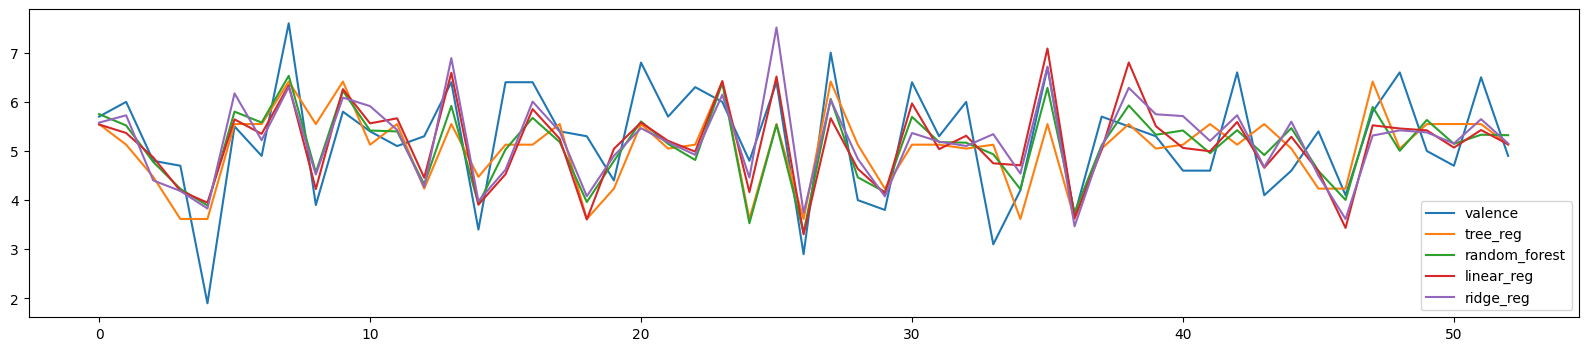

In [5]:
########## VALENCE ##########

# ----- select variables
from sklearn.model_selection import train_test_split
X_train_val, X_test_val, y_train_val, y_test_val = train_test_split(explicative, objective_valence, test_size=0.03, random_state=42)

# --- init matix to compare results
compare_valence = pd.DataFrame(y_test_val)

# --- decission tree
from sklearn.tree import DecisionTreeRegressor
tree_regr_model_valence = DecisionTreeRegressor(criterion = 'squared_error',
                                                max_depth = 3,
                                                max_features = None,
                                                max_leaf_nodes = None,
                                                min_samples_leaf = 1, 
                                                min_samples_split = 4,
                                                random_state = None,
                                                splitter = 'best') 
tree_regr_model_valence.fit(X=X_train_val, y=y_train_val)
pred_tree_regr_model_valence = tree_regr_model_valence.predict(X_test_val)
compare_valence = pd.concat([compare_valence.reset_index(), pd.DataFrame(pred_tree_regr_model_valence, columns=['tree_reg'])],
                            axis = 1,
                            ignore_index=False)


# --- random forest
from sklearn.ensemble import RandomForestRegressor
random_forest_model_valence = RandomForestRegressor(n_estimators = 200,
                                                    criterion = 'squared_error',
                                                    max_depth = None,
                                                    min_samples_split = 4,
                                                    max_features = None,
                                                    random_state = None,
                                                    bootstrap = True)
random_forest_model_valence.fit(X=X_train_val, y=y_train_val)
pred_random_forest_model_valence = random_forest_model_valence.predict(X_test_val) 
compare_valence = pd.concat([compare_valence.reset_index(), pd.DataFrame(pred_random_forest_model_valence, columns=['random_forest'])],
                            axis = 1,
                            ignore_index=False)




# ------ linear regresion
from sklearn.linear_model import LinearRegression
reg_linnear_model_valence = LinearRegression(fit_intercept = False, 
                                             copy_X = True,
                                             positive = True,
                                             n_jobs = None)
reg_linnear_model_valence.fit(X=X_train_val, y=y_train_val)
pred_linear_model_valence = reg_linnear_model_valence.predict(X_test_val)
compare_valence = pd.concat([compare_valence, pd.DataFrame(pred_linear_model_valence, columns=['linear_reg'])],
                            axis = 1,
                            ignore_index=False)



# ------ ridge regresion
from sklearn.linear_model import Ridge
ridge_reg_model_valence = Ridge(alpha = 5.0, 
                               solver = 'svd',
                               max_iter = None,
                               positive = False,
                               random_state = None)
ridge_reg_model_valence.fit(X=X_train_val, y=y_train_val)
pred_ridge_reg_model_valence = ridge_reg_model_valence.predict(X_test_val)
compare_valence = pd.concat([compare_valence, pd.DataFrame(pred_ridge_reg_model_valence, columns=['ridge_reg'])],
                            axis = 1,
                            ignore_index=False)


#print(compare_valence)
compare_valence.drop(columns=['index', 'level_0']).plot(figsize=(20,4));

#### ------ métricas
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

# mean absolute error (MAE)
mae_tree_reg_valence = mean_absolute_error(compare_valence['valence'], compare_valence['tree_reg'])
mae_random_forest_valence = mean_absolute_error(compare_valence['valence'], compare_valence['random_forest'])
mae_linear_reg_valence = mean_absolute_error(compare_valence['valence'], compare_valence['linear_reg'])
mae_ridge_reg_valence = mean_absolute_error(compare_valence['valence'], compare_valence['ridge_reg'])

# mean squared error (MSE)
mse_tree_reg_valence = mean_squared_error(compare_valence['valence'], compare_valence['tree_reg'])
mse_random_forest_valence = mean_squared_error(compare_valence['valence'], compare_valence['random_forest'])
mse_linear_reg_valence = mean_squared_error(compare_valence['valence'], compare_valence['linear_reg'])
mse_ridge_reg_valence = mean_squared_error(compare_valence['valence'], compare_valence['ridge_reg'])

# r2
r2_tree_reg_valence = r2_score(compare_valence['valence'], compare_valence['tree_reg'])
r2_random_forest_valence = r2_score(compare_valence['valence'], compare_valence['random_forest'])
r2_linear_reg_valence = r2_score(compare_valence['valence'], compare_valence['linear_reg'])
r2_ridge_reg_valence = r2_score(compare_valence['valence'], compare_valence['ridge_reg'])


# mean absolute percentage error (MAPE)
mape_tree_reg_valence = mean_absolute_percentage_error(compare_valence['valence'], compare_valence['tree_reg'])
mape_random_forest_valence = mean_absolute_percentage_error(compare_valence['valence'], compare_valence['random_forest'])
mape_linear_reg_valence = mean_absolute_percentage_error(compare_valence['valence'], compare_valence['linear_reg'])
mape_ridge_reg_valence = mean_absolute_percentage_error(compare_valence['valence'], compare_valence['ridge_reg'])


metrics_valence = pd.DataFrame([[mae_tree_reg_valence, mse_tree_reg_valence, r2_tree_reg_valence, mape_tree_reg_valence],
                                [mae_random_forest_valence, mse_random_forest_valence, r2_random_forest_valence, mape_random_forest_valence],
                                [mae_linear_reg_valence, mse_linear_reg_valence, r2_linear_reg_valence, mape_linear_reg_valence],
                                [mae_ridge_reg_valence, mse_ridge_reg_valence, r2_ridge_reg_valence, mape_ridge_reg_valence]], 
                               columns=['MAE', 'MSE', 'R2', 'MAPE'], 
                               index=['Decission Tree Regressor', 'Random forest', 'Linear Regression', 'Ridge Regression'])
metrics_valence

# Arousal comparation

level_0  index  arousal  tree_reg  random_forest  linear_reg  ridge_reg
0         0   1085     5.10  5.830149       5.667950    5.444185   5.497524
1         1   1117     4.10  4.921477       4.877000    5.513622   5.930723
2         2    593     3.40  4.136364       4.604150    4.233084   4.126674
3         3    842     3.50  4.136364       4.059000    4.341956   3.873693
4         4    861     2.80  4.136364       3.712250    3.844781   3.794989
5         5    799     6.90  5.830149       5.847250    5.667571   6.169417
6         6    351     5.80  5.830149       5.746000    5.512240   5.118398
7         7   1576     7.00  5.261682       5.946500    6.376776   6.249847
8         8   1091     2.90  4.522688       4.566800    4.619787   4.271240
9         9   1737     5.90  5.830149       6.048000    6.288048   6.392845
10       10   1416     6.20  5.290435       5.892700    6.057146   5.917371
11       11   1271     3.60  5.261682       5.560500    5.843103   5.717758
12       12    903     3.70  3.143056       3.279500    4.116941   3.985438
13       13    554     6.60  5.830149       5.984000    6.608668   7.510357
14       14    855     4.80  4.136364       4.272900    3.665747   3.030721
15       15    938     6.80  5.290435       5.012400    4.870011   4.491002
16       16    371     4.80  4.921477       5.155000    6.106851   6.125615
17       17   1155     5.50  5.261682       5.696300    5.364943   5.726336
18       18   1564     5.30  3.885294       4.247500    3.552749   3.860004
19       19   1684     3.80  5.261682       4.827500    4.823769   4.546567
20       20    582     6.30  5.830149       6.102250    5.953725   6.679358
21       21   1113     6.60  5.830149       5.658500    5.208943   5.017942
22       22    486     4.20  5.290435       5.176250    5.146982   5.155293
23       23    979     5.20  5.830149       5.653250    6.272360   5.007573
24       24    942     5.60  4.921477       4.387000    4.390480   4.279066
25       25    322     6.30  4.921477       5.297000    6.707886   6.621319
26       26    237     4.40  3.885294       3.826500    3.291845   3.383445
27       27    365     3.30  5.830149       6.036500    5.319275   6.159162
28       28    613     3.20  4.136364       3.499500    3.768716   4.265660
29       29    394     3.10  3.143056       3.370000    3.779864   3.478131
30       30    538     5.70  4.921477       5.124250    5.308596   5.317516
31       31    514     5.80  5.290435       5.338350    5.072529   4.994753
32       32   1067     5.70  5.261682       5.438000    5.409697   5.062784
33       33    599     3.70  4.136364       4.685650    4.942576   5.396165
34       34    557     5.50  3.143056       3.875000    4.798239   4.345404
35       35   1308     6.60  5.830149       5.972000    7.351804   7.104982
36       36     23     3.30  3.143056       3.511000    3.705004   3.209552
37       37    857     5.90  5.261682       5.735950    5.147429   5.190556
38       38    888     6.30  5.830149       5.865625    6.514895   5.990796
39       39    289     5.70  5.830149       6.172500    5.757807   5.954180
40       40    212     4.90  4.921477       4.664500    5.146921   5.758047
41       41    188     4.00  5.830149       5.215100    4.736972   4.730925
42       42    611     6.60  5.290435       5.726500    5.946397   5.699733
43       43    239     4.20  4.921477       4.153000    4.411011   4.640238
44       44   1364     6.18  5.830149       6.216000    5.870680   6.188207
45       45   1009     3.90  3.143056       3.465000    4.240045   4.481632
46       46    495     2.70  3.143056       3.362000    2.769991   3.105111
47       47   1208     6.10  4.522688       5.301107    5.009954   4.556755
48       48    946     6.00  5.261682       5.650350    5.404492   5.707796
49       49   1492     5.30  5.830149       5.715250    5.345934   5.304708
50       50    535     7.10  5.830149       5.922000    5.114458   5.776918
51       51   1722     6.20  5.830149       5.837000

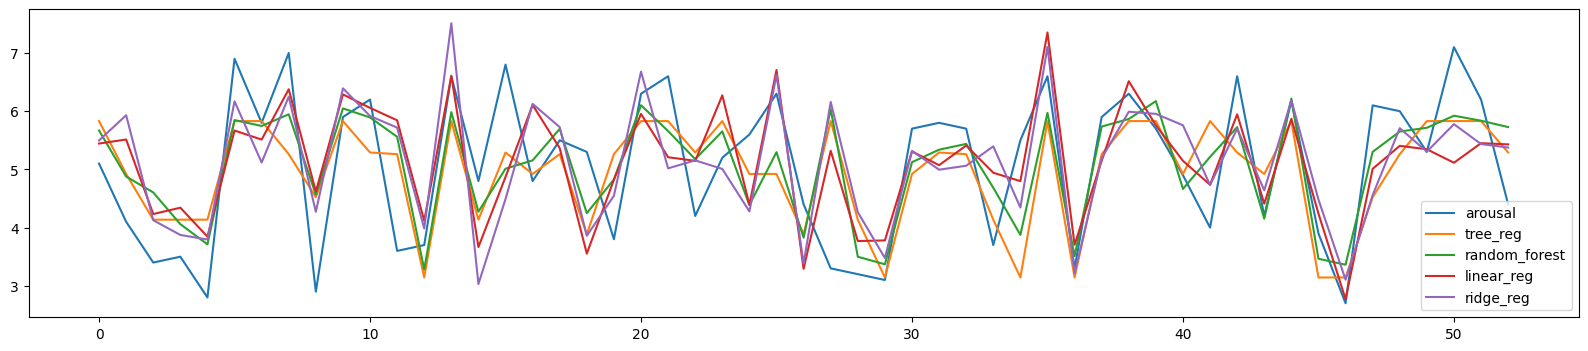

In [6]:
########## AROUSAL ##########

# ----- select variables
from sklearn.model_selection import train_test_split
X_train_ar, X_test_ar, y_train_ar, y_test_ar = train_test_split(explicative, objective_arousal, test_size=0.03, random_state=42)

# ------ init matrix to compare
compare_arousal = pd.DataFrame(y_test_ar)

# --- decission tree
from sklearn.tree import DecisionTreeRegressor
tree_regr_model_arousal = DecisionTreeRegressor(criterion = 'squared_error',
                                                max_depth = 3,
                                                max_features = None,
                                                max_leaf_nodes = None,
                                                min_samples_leaf = 1, 
                                                min_samples_split = 2,
                                                random_state = None,
                                                splitter = 'best') 
tree_regr_model_arousal.fit(X=X_train_ar, y=y_train_ar)
pred_tree_regr_model_arousal = tree_regr_model_arousal.predict(X_test_ar)
compare_arousal = pd.concat([compare_arousal.reset_index(), pd.DataFrame(pred_tree_regr_model_arousal, columns=['tree_reg'])],
                            axis = 1,
                            ignore_index=False)


# --- random forest
from sklearn.ensemble import RandomForestRegressor
random_forest_model_arousal = RandomForestRegressor(n_estimators = 200,
                                                    criterion = 'squared_error',
                                                    max_depth = None,
                                                    min_samples_split = 2,
                                                    max_features = None,
                                                    random_state = None,
                                                    bootstrap = True)
random_forest_model_arousal.fit(X=X_train_ar, y=y_train_ar)
pred_random_forest_model_arousal = random_forest_model_arousal.predict(X_test_ar) 
compare_arousal = pd.concat([compare_arousal.reset_index(), pd.DataFrame(pred_random_forest_model_arousal, columns=['random_forest'])],
                            axis = 1,
                            ignore_index=False)




# ------ linear regresion
from sklearn.linear_model import LinearRegression
reg_linnear_model_arousal = LinearRegression(fit_intercept = False, 
                                             copy_X = True,
                                             positive = True,
                                             n_jobs = None)
reg_linnear_model_arousal.fit(X=X_train_ar, y=y_train_ar)
pred_linear_model_arousal = reg_linnear_model_arousal.predict(X_test_ar)
compare_arousal = pd.concat([compare_arousal, pd.DataFrame(pred_linear_model_arousal, columns=['linear_reg'])],
                            axis = 1,
                            ignore_index=False)



# ------ ridge regresion
from sklearn.linear_model import Ridge
ridge_reg_model_arousal = Ridge(alpha = 5.0, 
                               solver = 'svd',
                               max_iter = None,
                               positive = False,
                               random_state = None)
ridge_reg_model_arousal.fit(X=X_train_ar, y=y_train_ar)
pred_ridge_reg_model_arousal = ridge_reg_model_arousal.predict(X_test_ar)
compare_arousal = pd.concat([compare_arousal, pd.DataFrame(pred_ridge_reg_model_arousal, columns=['ridge_reg'])],
                            axis = 1,
                            ignore_index=False)


#print(compare_arousal)
compare_arousal.drop(columns=['index', 'level_0']).plot(figsize=(20,4));

#### ------ metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

# mean absolute error (MAE)
mae_tree_reg_arousal = mean_absolute_error(compare_arousal['arousal'], compare_arousal['tree_reg'])
mae_random_forest_arousal = mean_absolute_error(compare_arousal['arousal'], compare_arousal['random_forest'])
mae_linear_reg_arousal = mean_absolute_error(compare_arousal['arousal'], compare_arousal['linear_reg'])
mae_ridge_reg_arousal = mean_absolute_error(compare_arousal['arousal'], compare_arousal['ridge_reg'])

# mean square error (MSE)
mse_tree_reg_arousal = mean_squared_error(compare_arousal['arousal'], compare_arousal['tree_reg'])
mse_random_forest_arousal = mean_squared_error(compare_arousal['arousal'], compare_arousal['random_forest'])
mse_linear_reg_arousal = mean_squared_error(compare_arousal['arousal'], compare_arousal['linear_reg'])
mse_ridge_reg_arousal = mean_squared_error(compare_arousal['arousal'], compare_arousal['ridge_reg'])

# r2
r2_tree_reg_arousal = r2_score(compare_arousal['arousal'], compare_arousal['tree_reg'])
r2_random_forest_arousal = r2_score(compare_arousal['arousal'], compare_arousal['random_forest'])
r2_linear_reg_arousal = r2_score(compare_arousal['arousal'], compare_arousal['linear_reg'])
r2_ridge_reg_arousal = r2_score(compare_arousal['arousal'], compare_arousal['ridge_reg'])

# mean absolute percentage error (MAPE)
mape_tree_reg_arousal = mean_absolute_percentage_error(compare_arousal['arousal'], compare_arousal['tree_reg'])
mape_random_forest_arousal = mean_absolute_percentage_error(compare_arousal['arousal'], compare_arousal['random_forest'])
mape_linear_reg_arousal = mean_absolute_percentage_error(compare_arousal['arousal'], compare_arousal['linear_reg'])
mape_ridge_reg_arousal = mean_absolute_percentage_error(compare_arousal['arousal'], compare_arousal['ridge_reg'])


matrix_arousal = pd.DataFrame([[mae_tree_reg_arousal, mse_tree_reg_arousal, r2_tree_reg_arousal, mape_tree_reg_arousal],
                                [mae_random_forest_arousal, mse_random_forest_arousal, r2_random_forest_arousal, mape_random_forest_arousal],
                                [mae_linear_reg_arousal, mse_linear_reg_arousal, r2_linear_reg_arousal, mape_linear_reg_arousal],
                                [mae_ridge_reg_arousal, mse_ridge_reg_arousal, r2_ridge_reg_arousal, mape_ridge_reg_arousal]], 
                               columns=['MAE', 'MSE', 'R2', 'MAPE'], 
                               index=['Decission Tree Regressor', 'Random forest', 'Linear Regression', 'Ridge Regression'])
compare_arousal

# Importance of features

In [150]:

# -- importance decission tree
imp_tree_reg_valence = pd.DataFrame(tree_regr_model_valence.feature_importances_, index=explicative.columns, columns=['Importancia'])
imp_tree_reg_arousal = pd.DataFrame(tree_regr_model_arousal.feature_importances_, index=explicative.columns, columns=['Importancia'])

print(imp_tree_reg_valence.sort_values(by='Importancia', ascending=False).head(10))
print(imp_tree_reg_arousal.sort_values(by='Importancia', ascending=False).head(10))

# -- importance random forest
imp_random_forest_valence = pd.DataFrame(random_forest_model_valence.feature_importances_, index=explicative.columns, columns=['Importancia'])
imp_random_forest_arousal = pd.DataFrame(random_forest_model_arousal.feature_importances_, index=explicative.columns, columns=['Importancia'])

print(imp_random_forest_valence.sort_values(by='Importancia', ascending=False).head(10))
print(imp_random_forest_arousal.sort_values(by='Importancia', ascending=False).head(10))

# -- importance linear regression
imp_linear_reg_valence = pd.DataFrame(reg_linnear_model_valence.coef_, index=explicative.columns, columns=['Importancia'])
imp_linear_reg_arousal = pd.DataFrame(reg_linnear_model_arousal.coef_, index=explicative.columns, columns=['Importancia'])

print(imp_linear_reg_valence.sort_values(by='Importancia', ascending=False).head(10))
print(imp_linear_reg_arousal.sort_values(by='Importancia', ascending=False).head(10))

# -- importance ridge regression
imp_ridge_reg_valence = pd.DataFrame(ridge_reg_model_valence.coef_, index=explicative.columns, columns=['Importancia'])
imp_ridge_reg_arousal = pd.DataFrame(ridge_reg_model_arousal.coef_, index=explicative.columns, columns=['Importancia'])

print(imp_ridge_reg_valence.sort_values(by='Importancia', ascending=False).head(10))
print(imp_ridge_reg_arousal.sort_values(by='Importancia', ascending=False).head(10))


                                    Importancia
audspec_lengthL1norm_sma_de_stddev     0.590566
pcm_fftMag_mfcc_sma[1]_amean           0.283756
jitterLocal_sma_de_stddev              0.063279
audspec_lengthL1norm_sma_amean         0.062399
F0final_sma_stddev                     0.000000
audSpec_Rfilt_sma_de[13]_amean         0.000000
audSpec_Rfilt_sma_de[13]_stddev        0.000000
audSpec_Rfilt_sma_de[12]_amean         0.000000
audSpec_Rfilt_sma_de[12]_stddev        0.000000
audSpec_Rfilt_sma_de[11]_amean         0.000000
                                          Importancia
audspec_lengthL1norm_sma_amean               0.577854
pcm_fftMag_spectralEntropy_sma_de_stddev     0.147803
audspec_lengthL1norm_sma_de_stddev           0.147049
logHNR_sma_amean                             0.037789
pcm_fftMag_mfcc_sma[1]_amean                 0.030927
pcm_fftMag_spectralVariance_sma_amean        0.030360
shimmerLocal_sma_de_stddev                   0.028218
audSpec_Rfilt_sma_de[13]_stddev         

# Representation

In [7]:
valence_representation = compare_valence.head(5)
#print(valence_representation)


In [8]:
arousal_representation = compare_arousal.head(5)
#print(arousal_representation)

In [14]:
real = pd.concat([valence_representation["valence"], arousal_representation["arousal"]], axis=1)
#print(real)

pred_tree_reg = pd.concat([valence_representation["tree_reg"], arousal_representation["tree_reg"]], axis=1)
pred_tree_reg.columns = ['valence_tree_reg', 'arousal_tree_reg']

pred_random_forest = pd.concat([valence_representation["random_forest"], arousal_representation["random_forest"]], axis=1)
pred_random_forest.columns = ['valence_random_forest', 'arousal_random_forest']

pred_linear_reg = pd.concat([valence_representation["linear_reg"], arousal_representation["linear_reg"]], axis=1)
pred_linear_reg.columns = ['valence_linear_reg', 'arousal_linear_reg']

pred_ridge_reg = pd.concat([valence_representation["ridge_reg"], arousal_representation["ridge_reg"]], axis=1)
pred_ridge_reg.columns = ['valence_ridge_reg', 'arousal_ridge_reg']

#print(pred_ridge_reg)



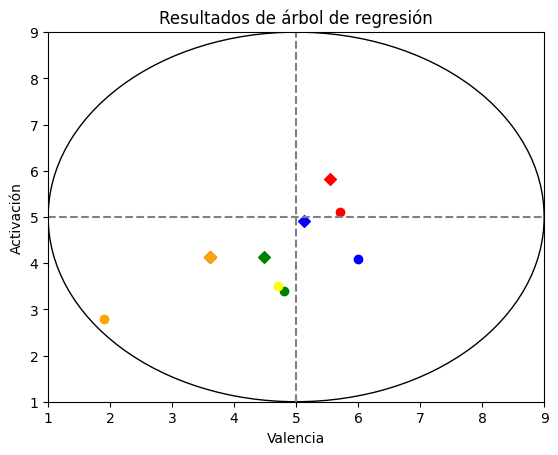

3.6156250000000014 4.136363636363634
4.7 3.5


In [70]:
# ---- DECISSION TREE
import matplotlib.pyplot as plt

# Separate coordinates X, Y
x_real = real["valence"]
y_real = real["arousal"]

x_pred_tree_reg = pred_tree_reg["valence_tree_reg"]
y_pred_tree_reg = pred_tree_reg["arousal_tree_reg"]

# Create figure
fig, ax = plt.subplots()

# Definir el radio del círculo
radius = 4

# Dibujar el círculo
circle = plt.Circle((5, 5), radius, color='black', fill=False)
ax.add_artist(circle)

# Show the points
ax.scatter(x_real[0], y_real[0], c = "red", label = "Canción 1085")
ax.scatter(x_pred_tree_reg[0], y_pred_tree_reg[0], c = "red", marker='D')
ax.scatter(x_real[1], y_real[1], c = "blue", label = "Canción 1117")
ax.scatter(x_pred_tree_reg[1], y_pred_tree_reg[1], c = "blue", marker='D')
ax.scatter(x_real[2], y_real[2], c = "green", label = "Canción 593")
ax.scatter(x_pred_tree_reg[2], y_pred_tree_reg[2], c = "green", marker='D')
ax.scatter(x_real[3], y_real[3], c = "yellow", label = "Canción 842")
ax.scatter(x_pred_tree_reg[3], y_pred_tree_reg[3], c = "purple", marker='D')
ax.scatter(x_real[4], y_real[4], c = "orange", label = "Canción 861")
ax.scatter(x_pred_tree_reg[4], y_pred_tree_reg[4], c = "orange", marker='D')

# Set the limits
ax.set_xlim(1, 9)
ax.set_ylim(1, 9)

# Set the axis
ax.axhline(5, color='gray', linestyle='--')
ax.axvline(5, color='gray', linestyle='--')


ax.set_xlabel('Valencia')
ax.set_ylabel('Activación')
ax.set_title('Resultados de árbol de regresión')


# Mostrar la gráfica
plt.show()

print(x_pred_tree_reg[3], y_pred_tree_reg[3])
print(x_real[3], y_real[3])

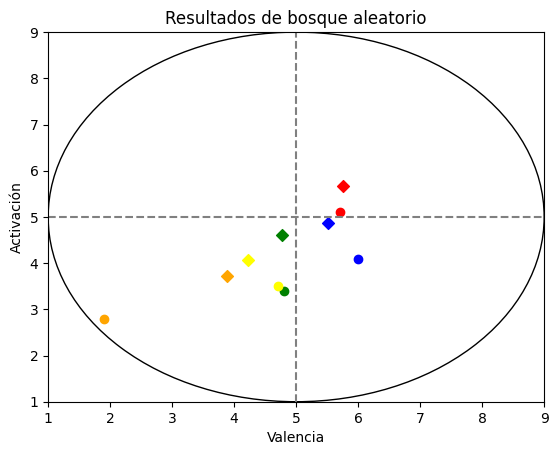

In [69]:
# ----RANDOM FOREST
import matplotlib.pyplot as plt

# Separate coordinates X, Y
x_real = real["valence"]
y_real = real["arousal"]

x_pred_random_forest = pred_random_forest["valence_random_forest"]
y_pred_random_forest = pred_random_forest["arousal_random_forest"]

# Create figure
fig, ax = plt.subplots()

# Definir el radio del círculo
radius = 4

# Dibujar el círculo
circle = plt.Circle((5, 5), radius, color='black', fill=False)
ax.add_artist(circle)

# Show the points
ax.scatter(x_real[0], y_real[0], c = "red", label = "Canción 1085")
ax.scatter(x_pred_random_forest[0], y_pred_random_forest[0], c = "red", marker='D')
ax.scatter(x_real[1], y_real[1], c = "blue", label = "Canción 1117")
ax.scatter(x_pred_random_forest[1], y_pred_random_forest[1], c = "blue", marker='D')
ax.scatter(x_real[2], y_real[2], c = "green", label = "Canción 593")
ax.scatter(x_pred_random_forest[2], y_pred_random_forest[2], c = "green", marker='D')
ax.scatter(x_real[3], y_real[3], c = "yellow", label = "Canción 842")
ax.scatter(x_pred_random_forest[3], y_pred_random_forest[3], c = "yellow", marker='D')
ax.scatter(x_real[4], y_real[4], c = "orange", label = "Canción 861")
ax.scatter(x_pred_random_forest[4], y_pred_random_forest[4], c = "orange", marker='D')

# Set the limits
ax.set_xlim(1, 9)
ax.set_ylim(1, 9)

# Set the axis
ax.axhline(5, color='gray', linestyle='--')
ax.axvline(5, color='gray', linestyle='--')


ax.set_xlabel('Valencia')
ax.set_ylabel('Activación')
ax.set_title('Resultados de bosque aleatorio')


# Mostrar la gráfica
plt.show()

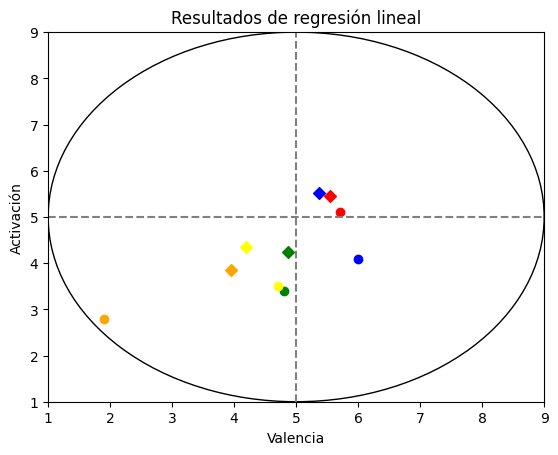

In [68]:
# ---- LINEAR REGRESSION
import matplotlib.pyplot as plt

# Separate coordinates X, Y
x_real = real["valence"]
y_real = real["arousal"]

x_pred_linear_reg = pred_linear_reg["valence_linear_reg"]
y_pred_linear_reg = pred_linear_reg["arousal_linear_reg"]

# Create figure
fig, ax = plt.subplots()

# Definir el radio del círculo
radius = 4

# Dibujar el círculo
circle = plt.Circle((5, 5), radius, color='black', fill=False)
ax.add_artist(circle)

# Show the points
ax.scatter(x_real[0], y_real[0], c = "red", label = "Canción 1085")
ax.scatter(x_pred_linear_reg[0], y_pred_linear_reg[0], c = "red", marker='D')
ax.scatter(x_real[1], y_real[1], c = "blue", label = "Canción 1117")
ax.scatter(x_pred_linear_reg[1], y_pred_linear_reg[1], c = "blue", marker='D')
ax.scatter(x_real[2], y_real[2], c = "green", label = "Canción 593")
ax.scatter(x_pred_linear_reg[2], y_pred_linear_reg[2], c = "green", marker='D')
ax.scatter(x_real[3], y_real[3], c = "yellow", label = "Canción 842")
ax.scatter(x_pred_linear_reg[3], y_pred_linear_reg[3], c = "yellow", marker='D')
ax.scatter(x_real[4], y_real[4], c = "orange", label = "Canción 861")
ax.scatter(x_pred_linear_reg[4], y_pred_linear_reg[4], c = "orange", marker='D')

# Set the limits
ax.set_xlim(1, 9)
ax.set_ylim(1, 9)

# Set the axis
ax.axhline(5, color='gray', linestyle='--')
ax.axvline(5, color='gray', linestyle='--')


ax.set_xlabel('Valencia')
ax.set_ylabel('Activación')
ax.set_title('Resultados de regresión lineal')


# Mostrar la gráfica
plt.show()

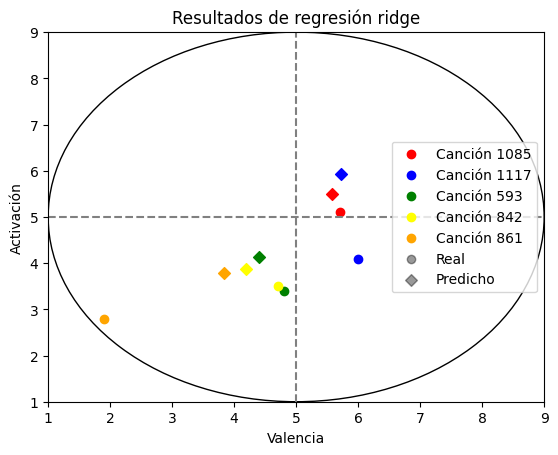

In [67]:
# ---- REGRESSION RIDGE
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
# Separate coordinates X, Y
x_real = real["valence"]
y_real = real["arousal"]

x_pred_ridge_reg = pred_ridge_reg["valence_ridge_reg"]
y_pred_ridge_reg = pred_ridge_reg["arousal_ridge_reg"]

# Create figure
fig, ax = plt.subplots()

# Definir el radio del círculo
radius = 4

# Dibujar el círculo
circle = plt.Circle((5, 5), radius, color='black', fill=False)
ax.add_artist(circle)

# Show the points
ax.scatter(x_real[0], y_real[0], c = "red", label = "Canción 1085")
ax.scatter(x_pred_ridge_reg[0], y_pred_ridge_reg[0], c = "red", marker='D')
ax.scatter(x_real[1], y_real[1], c = "blue", label = "Canción 1117")
ax.scatter(x_pred_ridge_reg[1], y_pred_ridge_reg[1], c = "blue", marker='D')
ax.scatter(x_real[2], y_real[2], c = "green", label = "Canción 593")
ax.scatter(x_pred_ridge_reg[2], y_pred_ridge_reg[2], c = "green", marker='D')
ax.scatter(x_real[3], y_real[3], c = "yellow", label = "Canción 842")
ax.scatter(x_pred_ridge_reg[3], y_pred_ridge_reg[3], c = "yellow", marker='D')
ax.scatter(x_real[4], y_real[4], c = "orange", label = "Canción 861")
ax.scatter(x_pred_ridge_reg[4], y_pred_ridge_reg[4], c = "orange", marker='D')
ax.scatter([0], [0], c='black', marker='o', label = "Real", alpha = 0.4)
ax.scatter([0], [0], c='black', marker='D', label = "Predicho", alpha = 0.4)

ax.legend()

# Set the limits
ax.set_xlim(1, 9)
ax.set_ylim(1, 9)

# Set the axis
ax.axhline(5, color='gray', linestyle='--')
ax.axvline(5, color='gray', linestyle='--')


ax.set_xlabel('Valencia')
ax.set_ylabel('Activación')
ax.set_title('Resultados de regresión ridge')


# Mostrar la gráfica
plt.show()